## Madrid Property Analysis

Github Link: https://github.com/adnanbhanji/

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Data Split
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem statement
- This project uses the provided dataset to estimate property prices in Madrid, with a regression model using algorithms seen in class. Then the problem is redifined to create a classification problem.

#### 2) Data Collection
- Dataset Source - The dataset was provided to us and is located in the data/raw directory.
- The data consists of 17857 rows and 26 columns.

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit


/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_36456/1474376660.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the Excel Data as Pandas DataFrame

In [ ]:
df = pd.read_excel('../data/raw/session_7_dataset.xlsx')

##### 2.2 Dataset Information

Taking a Quick Look at the Data Structure

In [ ]:
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,...,8.724674,2.527886,0.488949,0.175632,15.456193,NaN,40838,16155,NaN,161.894356
1,1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2,NaN,NaN,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


In [ ]:
df.shape

(17857, 26)

Straight of the bat, we can see we have mix of both categorical and numerical data, and we can also see some NaN's in the first few rows. We will take care of this later, however we also notice we have several features of which we will determine their importance later in the model. In specific, this is what the columns represent:

 - Unnamed: 0: An index or identifier for the rows.
- inm_floor: The floor number on which the property is located.
- inm_size: The size of the property in square meters.
- inm_price: The listing price of the property.
- inm_longitude: The longitude coordinate of the property.
- inm_latitude: The latitude coordinate of the property.
- inm_barrio: The neighborhood name where the property is located.
- inm_distrito: The district name where the property is located.
- his_price: A historical pricing reference for the property.
- his_quarterly_variation: The change in price from the previous quarter.
- his_annual_variation: The change in price from the previous year.
- his_monthly_variation: The change in price from the previous month.
- dem_Indice_de_reemplazo_de_la_poblacion_activa: An index measuring the replacement rate of the working-age population.
- dem_Indice_de_juventud: An index measuring the youthfulness of the population.
- dem_Indice_de_estructura_de_la_poblacion_activa: An index reflecting the structure of the working-age population.
- dem_Indice_de_dependencia: An index measuring the dependency ratio in the population.
- dem_TasaDeParo: The unemployment rate in the area.
- dem_TamanoMedioDelHogar: The average household size.
- dem_PropSinEstudiosUniversitarios: The proportion of the population without university-level education.
- dem_PropSinEstudios: The proportion of the population without any educational qualifications.
- dem_Proporcion_de_nacidos_fuera_de_Espana: The proportion of the population born outside of Spain.
- dem_PropConEstudiosUniversitarios: The proportion of the population with university-level education.
- dem_PobTotal: The total population in the area.
- dem_NumViviendas: The total number of dwellings in the area.
- dem_EdadMedia: The average age of the population in the area.
- dem_Densidad_(Habit/Ha): The population density per hectare in the area.



We will take care of missing values and all later in the preprocessing state, but right now we will check them, however, we will get rid of the index column as it's not needed in our analysis.

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

#### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1 Check Missing Values

In [ ]:
# Check for missing values in the dfFrame
print(df.isnull().sum())

inm_floor                                          3790
inm_size                                           1767
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1794
inm_distrito                                       1747
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                               0
dem_PropSinEstudiosUniversitarios               

From the information above, we can notice that the inm_floor, inm_size, inm_barrio, inm_distrito, dem_PropConEstudiosUniversitarios, and dem_EdadMedia  features have missing values and for the floor its almost 1/6th of the dataset, and for others it's also quite a significant portion, so we will need to take care of this later in the processing.

##### 3.2 Check Duplicates

In [ ]:
df.duplicated().sum()

6

We can see there's no duplicates so we won't need to do anything related to duplicates from the raw dataset.

##### 3.3 Check Data Types

In [ ]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   inm_floor                                        14067 non-null  float64
 1   inm_size                                         16090 non-null  float64
 2   inm_price                                        17857 non-null  int64  
 3   inm_longitude                                    17857 non-null  float64
 4   inm_latitude                                     17857 non-null  float64
 5   inm_barrio                                       16063 non-null  object 
 6   inm_distrito                                     16110 non-null  object 
 7   his_price                                        17857 non-null  int64  
 8   his_quarterly_variation                          17857 non-null  float64
 9   his_annual_variation        

We can also see from the output above that we have int/float values which are our numerical variables, and we have 2 objects - inm_barrio, inm_distrito. Typically, an object could hold any kind of Python object, but since we loaded this data from an excel file, we know that it must be a text attribute.

##### 3.4 Checking the number of unique values of each column

In [ ]:
df.nunique()

inm_floor                                             23
inm_size                                             675
inm_price                                           2340
inm_longitude                                      16013
inm_latitude                                       16104
inm_barrio                                           121
inm_distrito                                          21
his_price                                            120
his_quarterly_variation                               70
his_annual_variation                                  89
his_monthly_variation                                 57
dem_Indice_de_reemplazo_de_la_poblacion_activa       121
dem_Indice_de_juventud                               121
dem_Indice_de_estructura_de_la_poblacion_activa      121
dem_Indice_de_dependencia                            121
dem_TasaDeParo                                       121
dem_TamanoMedioDelHogar                              121
dem_PropSinEstudiosUniversitari

Add an insight here

##### 3.5 Check statistics of data set

In [ ]:
df.describe()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
count,14067.000000,16090.000000,1.785700e+04,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,...,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,16132.000000,17857.000000,17857.000000,16067.000000,17857.000000
mean,2.696453,149.013753,6.964702e+05,-3.688064,40.424817,3993.643389,0.437918,-1.814499,0.035549,58.387524,...,8.736896,2.487494,0.436518,0.124281,24.851753,0.439830,28281.995296,11515.008960,44.315032,233.372820
std,2.387135,160.485808,8.547274e+05,0.039164,0.031176,1589.895597,2.510048,3.847875,1.533065,23.241554,...,3.042722,0.300608,0.109068,0.076923,8.542049,0.181168,13117.299282,5322.072109,2.842113,122.653928
min,-1.000000,8.000000,1.600000e+04,-3.837697,40.328140,1290.000000,-16.100000,-11.600000,-5.200000,26.976744,...,3.643735,1.975877,0.246480,0.036422,8.884988,0.072421,2398.000000,872.000000,33.198916,2.267773
25%,1.000000,66.000000,1.899000e+05,-3.708170,40.402633,2578.000000,-1.100000,-4.300000,-0.600000,41.889843,...,6.291480,2.297491,0.340818,0.062095,18.746056,0.257582,18785.000000,8011.000000,43.161070,155.641754
50%,2.000000,98.000000,3.700000e+05,-3.692498,40.426586,4049.000000,0.500000,-2.200000,0.000000,51.910341,...,8.076921,2.466320,0.391468,0.085268,23.400147,0.512828,25023.000000,10637.000000,45.113343,228.165728
75%,4.000000,166.000000,8.490000e+05,-3.669516,40.446864,5106.000000,1.900000,-0.100000,0.900000,65.111111,...,10.802359,2.673612,0.551965,0.191202,31.219133,0.592631,36922.000000,15312.000000,46.244228,322.402577
max,60.000000,2400.000000,1.500000e+07,-3.545674,40.507659,8299.000000,12.200000,17.200000,8.100000,171.272727,...,18.030112,3.506552,0.641264,0.355659,53.296248,0.699977,67418.000000,26836.000000,49.332035,460.612389


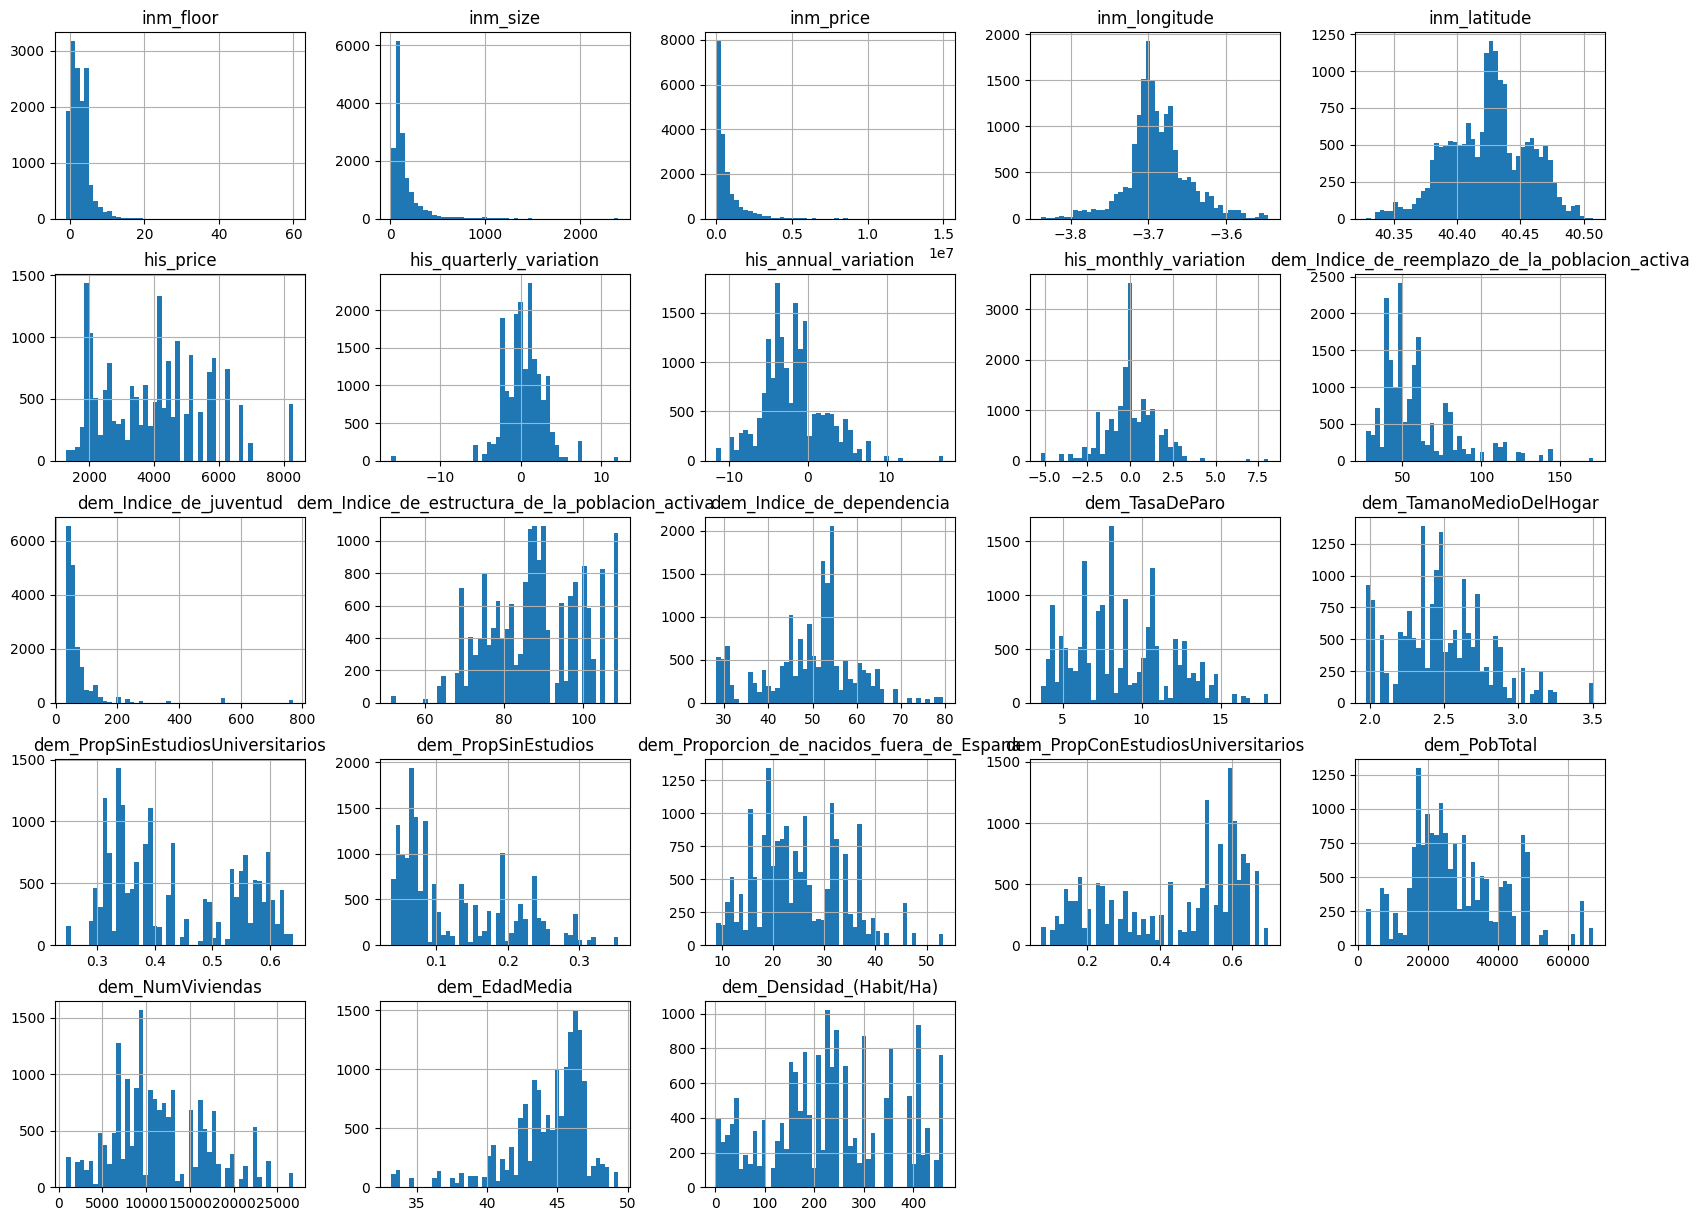

In [ ]:
# %matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Here are some inferences we can make from the above histograms and statistical data provided.

1. These attributes have very different scales, and we will take care of this while doing feature scaling.
2. We also notice that many histograms with the property related variables are tail-heavy: they extend much farther to the right of the median than to the left. We will try transforming these attributes later on to have more bell-shaped distributions. However, the demographic variables mostly seem to have average bell shaped distributions.
3. The presence of long tails in the histograms for property-related variables indicates potential outliers. We will Identify and handle these outliers for accurate modeling and analysis.

#### 4. Train Test Split


We will be splitting the data into training and testing sets. Spliiting the data at this point will help us to avoid data leakage, data snooping and overfitting.
We will use the training set to train the model and the testing set to evaluate the model.

Typically, we know that the bigger the house, it tends to be more expensive, so we can make an important assumption that property prize is an important variable, and can do stratified sampling based on that. We do this so that our train and test sets have almost equal proportions of the different size categories. If upon making the model, we get that it's not giving good results, we can always change this. However, from the chekcs we performed above, we saw that there are mising values for the size, and we cannot do the stratified sampling split, hence we will take care of the NaN values for just this feature right now, and the rest in the preprocessing stage. From the distribution histogram above of the size, we can see the data is very skewed and there's potential for outliers, so we will do median imputation to take care of that.

In [ ]:
# Calculate the median of the 'inm_size' column
size_median = df['inm_size'].median()

# Replace missing values with the median
df['inm_size'].fillna(size_median, inplace=True)

In [ ]:
# Assuming 'df' is your DataFrame and we will use 'inm_size' for stratification
# First, let's create the size categories based on the provided bin edges
df['size_category'] = pd.cut(df['inm_size'],
                             bins=[0, 66, 98, 166, np.inf],
                             labels=[1, 2, 3, 4])

# Drop rows where 'size_category' is NaN, which also drops corresponding NaNs in 'inm_size'
# df = df.dropna(subset=['size_category'])

# Now we perform stratified sampling based on the size category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['size_category']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# The resulting 'strat_train_set' and 'strat_test_set' will maintain the distribution of property sizes
# Let's check the distribution of the size categories in the stratified train set
print(strat_train_set['size_category'].value_counts(normalize=True))
print(strat_test_set['size_category'].value_counts(normalize=True))

# Save the stratified train and test sets as CSV files
strat_train_set.to_csv('../data/split/stratified_train_set.csv', index=False)
strat_test_set.to_csv('../data/split/stratified_test_set.csv', index=False)

size_category
2    0.322716
1    0.230102
4    0.224151
3    0.223031
Name: proportion, dtype: float64
size_category
2    0.322788
1    0.230123
4    0.224244
3    0.222844
Name: proportion, dtype: float64


## Madrid Property Analysis

#### 1) Exploratory Data Analysis
- In this step we will discover and visualize the data deeper to gain insights and check for correlations.

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_36583/1254213584.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('../data/split/stratified_train_set.csv')

In [ ]:
df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,his_annual_variation,...,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),size_category
0,1.0,98.0,450000,-3.671471,40.394387,San Diego,Puente de Vallecas,1865,-0.2,-3.2,...,2.720731,0.620067,0.239921,45.884872,0.140012,43899,16135,40.553031,410.321496,2
1,4.0,134.0,275000,-3.768347,40.394239,Campamento,Latina,2185,2.7,-4.8,...,2.653121,0.560289,0.194524,29.846836,0.245186,19848,7481,45.669589,21.594146,3
2,3.0,98.0,99000,-3.704487,40.383182,Pradolongo,Usera,2006,0.3,-5.3,...,2.960683,0.612718,0.285851,47.817560,0.101431,17847,6028,42.117751,162.889293,2
3,5.0,133.0,750000,-3.705981,40.435092,Arapiles,Chamberí,4750,-2.6,-5.5,...,2.174839,0.354871,0.080247,19.353141,0.564883,24704,11359,46.008905,427.235060,3
4,0.0,91.0,410960,-3.670821,40.423862,Goya,Salamanca,5697,2.5,-1.3,...,2.249305,0.345274,0.062095,23.072299,0.592631,29945,13313,46.234380,388.747885,2


In [ ]:
df.shape

(14285, 26)

Our dataset is now smaller, as expected as we have made the split and are currently only exploring the training dataset. We have alot of columns we can potentially explore and hence we will get started by visulaizing the geographical data that we have been provided.

##### 1.1 Visualizing Geographical Data

Since we are provided with geographical information (latitude and longitude), we can already create a scatterplot of all values to visualize the data. Since the districts and neighborhoods are categorical values, we will take care of them later in the preprocessing.

<Axes: xlabel='inm_longitude', ylabel='inm_latitude'>

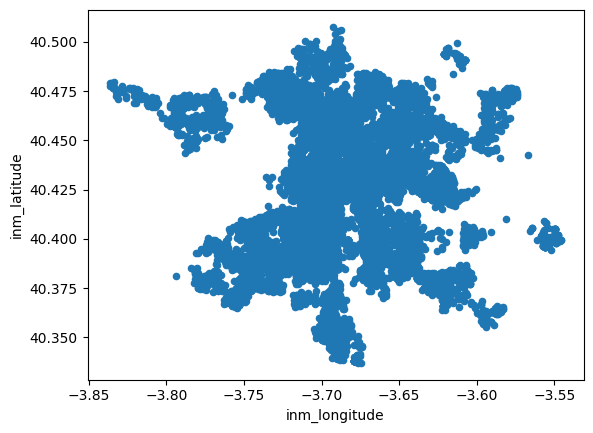

In [ ]:
df.plot(kind="scatter", x="inm_longitude", y="inm_latitude")

This looks like the properties are distributed all over Madrid, but other than that it is hard to see any particular pattern, so we will adjust the alpha value.

<Axes: xlabel='inm_longitude', ylabel='inm_latitude'>

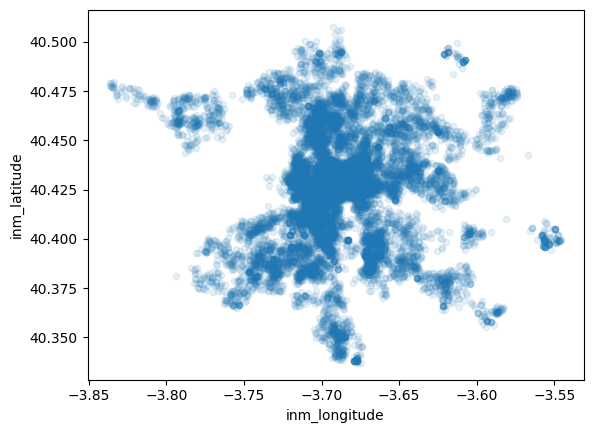

In [ ]:
df.plot(kind="scatter", x="inm_longitude", y="inm_latitude", alpha=0.1)

Now we can clearly see the high-density areas, and judging by the density towards the center we can predict that the most density is in areas like Salamance which are in the center, to be more specific areas such as Alonso Martinez, Tribunal etc.

<img src="../artifacts/map_overlay.png" alt="Map Overlay" width="750" height="350">

And after cross referencing with a map service, it is true, and from domain knowledge that does make sense.

We can extend this exploration to the housing prices. We will make a plot which will include the location coordinates, population, and prices now to see if there's a pattern. The radius of each circle represents the area's population, and the color represents the price. We will use a predefined a color map that allows us to easily visualize the different colors.

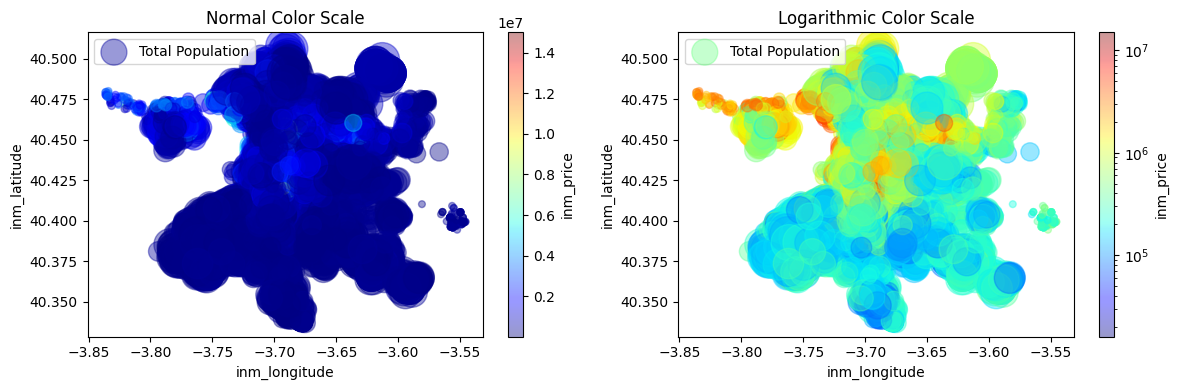

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Set up the matplotlib figure with two subplots, side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Normal color scale scatter plot on the left
df.plot(
    kind="scatter",
    x="inm_longitude",
    y="inm_latitude",
    alpha=0.4,
    s=df["dem_PobTotal"]/100,  # Size of points represent population
    label="Total Population",
    c="inm_price",  # Color of points represent price
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    ax=axes[0]  # This plot will be on the first subplot
)
axes[0].legend()
axes[0].set_title('Normal Color Scale')

# Logarithmic color scale scatter plot on the right
df.plot(
    kind="scatter",
    x="inm_longitude",
    y="inm_latitude",
    alpha=0.4,
    s=df["dem_PobTotal"]/100,  # Size of points represent population
    label="Total Population",
    c="inm_price",  # Color of points represent price
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    norm=LogNorm(),  # Apply a logarithmic scale to the color map
    ax=axes[1]  # This plot will be on the second subplot
)
axes[1].legend()
axes[1].set_title('Logarithmic Color Scale')

plt.tight_layout()  # Adjust the layout so the plots fit into the figure area well
plt.show()


We can see we have 2 outputs, one with the normal color scale, however, it's hard to identify the other colors with this representation. Hence I used a logarithmic color scale, as shown on the right, and we can see that it allows for better visualization of data when there are many low values and a few extremely high values. In this plot, the colors differentiate the data points more distinctly, showing the variation in 'imm_price' among locations that was not as apparent in the normal scale plot.

Looking at the logarithmic plot, we can observe areas with higher 'imm_price' values (warmer colors like red and yellow) and areas with lower values (cooler colors like blue and green). This suggests that there might be a trend or relationship between location (latitude and longitude) and the 'imm_price' variable.

In terms of a trend, the logarithmic plot suggests that there is a clustering of higher values in the center of the plot, which could suggest a trend where certain geographic locations are associated with higher or lower values of 'imm_price.'

##### 1.2 Categorical Features Exploration



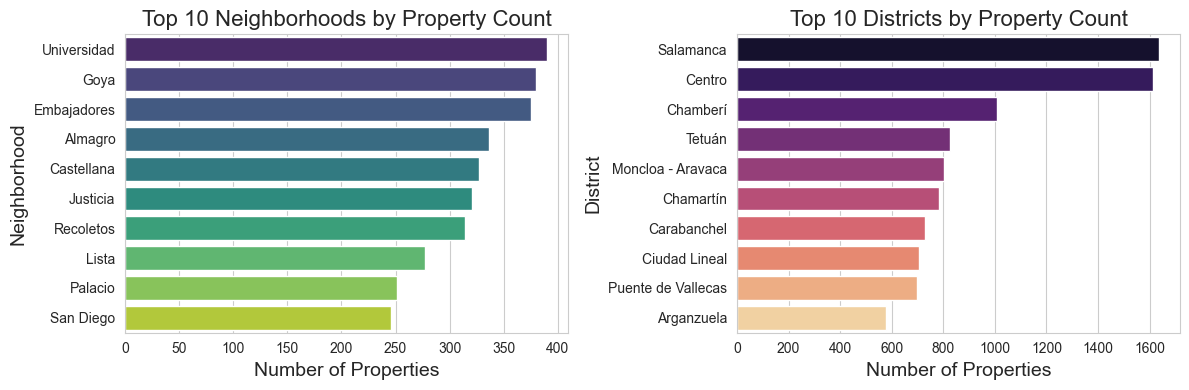

In [ ]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Create a count plot for neighborhoods
sns.countplot(data=df, y='inm_barrio', order=df['inm_barrio'].value_counts().index[:10], palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Neighborhoods by Property Count', fontsize=16)
axes[0].set_xlabel('Number of Properties', fontsize=14)
axes[0].set_ylabel('Neighborhood', fontsize=14)

# Create a count plot for districts
sns.countplot(data=df, y='inm_distrito', order=df['inm_distrito'].value_counts().index[:10], palette='magma', ax=axes[1])
axes[1].set_title('Top 10 Districts by Property Count', fontsize=16)
axes[1].set_xlabel('Number of Properties', fontsize=14)
axes[1].set_ylabel('District', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

We can see after plotting the top 10 neighborhoods and districts by property count, that we were actually right and our analysis with the latitude and longitude was true, as most as in the center.

##### 1.3 Visualizing Property Data

Based on the previous visualization of the distributions of the numerical variables, we were able to see that the property related variables were very skewed and we will dive deeper by checking the density plots.

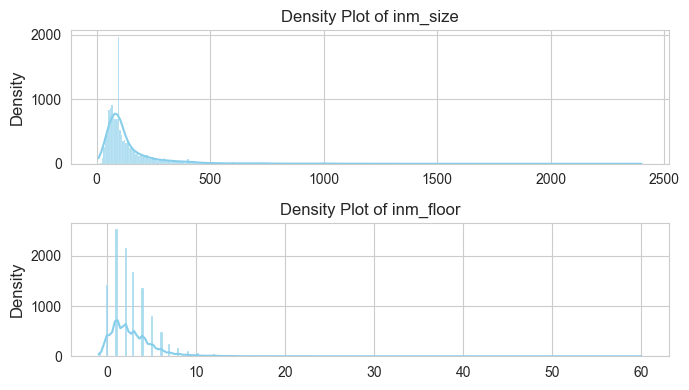

In [ ]:
# Select numerical features for density plots
numerical_features = ['inm_size', 'inm_floor']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(7, 4), sharex=False)

# Iterate over numerical features and create density plots
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], color='skyblue', alpha=0.7)
    axes[i].set_title(f'Density Plot of {feature}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

We can notice the following:

Firstly, our stratified split was justified, as the size values are very skewed and without the stratified sampling, there would be a high chance to get bias data in the training or test set. So by doing stratified split, we took care of that.

inm_size: The density plot for inm_size is heavily right-skewed, with a peak at the lower end of the size range. This indicates that the majority of the properties are small in size, and there are fewer large properties. There's a long tail extending to the right, suggesting there are outliers with very large sizes. So most of the houses are smaller in size, and we have some luxurious properties too towards the right.

inm_floor: The inm_floor plot also shows a right-skewness, though not as pronounced as inm_size. Most properties are located on the lower floors, and there are fewer properties as the floor number increases. There are very few properties above floor 20, which might be outliers or represent high-rise buildings.

##### 1.4 Looking for Correlations

Since our dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method, as it won't be very time consuming given our dataset size. We can view this in matrix heatmap form

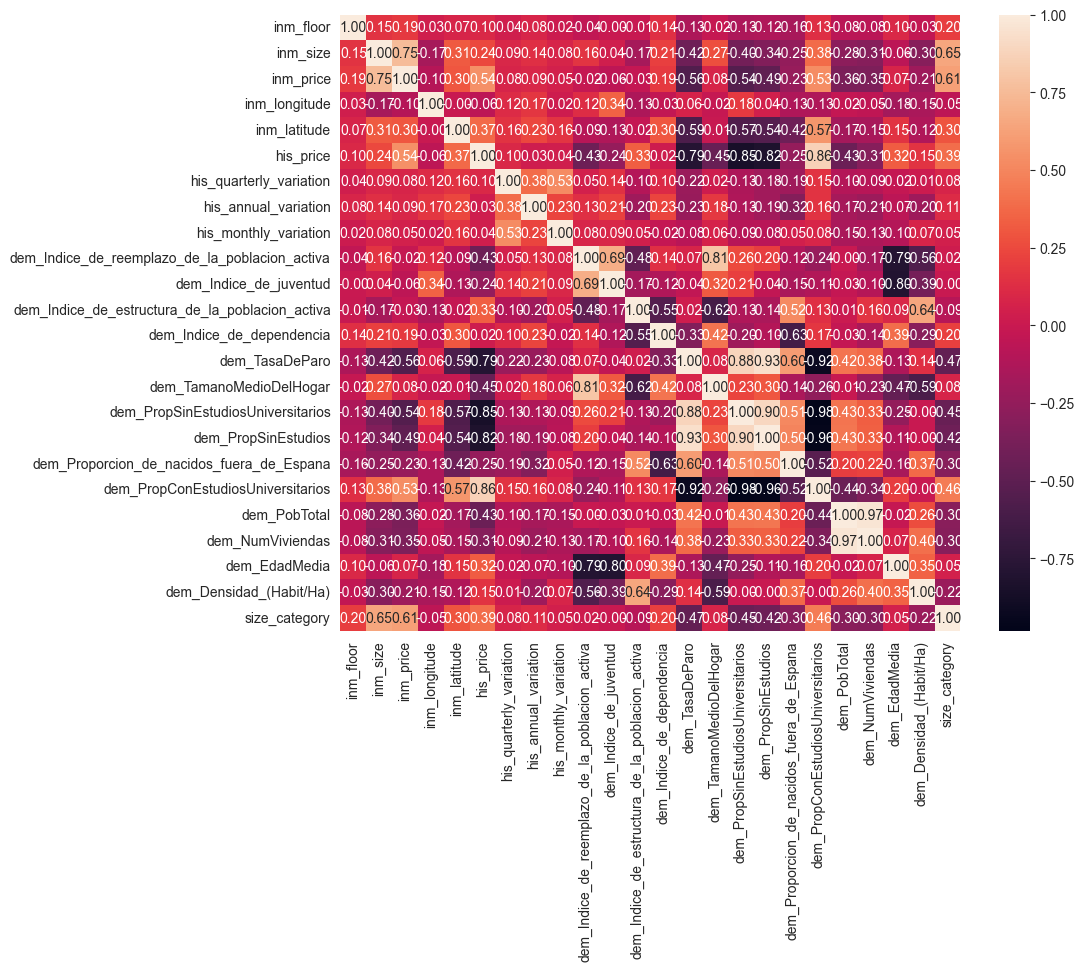

In [ ]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns only
corr = numerical_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Now we can look at how much each attribute correlates with our target variable in specfic too.

In [ ]:
corr["inm_price"].sort_values(ascending=False)

inm_price                                          1.000000
inm_size                                           0.754265
size_category                                      0.613816
his_price                                          0.544678
dem_PropConEstudiosUniversitarios                  0.532826
inm_latitude                                       0.301575
inm_floor                                          0.186551
dem_Indice_de_dependencia                          0.185792
his_annual_variation                               0.089830
dem_TamanoMedioDelHogar                            0.076538
his_quarterly_variation                            0.075234
dem_EdadMedia                                      0.073809
his_monthly_variation                              0.048731
dem_Indice_de_reemplazo_de_la_poblacion_activa    -0.018359
dem_Indice_de_estructura_de_la_poblacion_activa   -0.026008
dem_Indice_de_juventud                            -0.058008
inm_longitude                           

Based on the correlation heatmap and the sorted list of correlation coefficients we've done, it seems that some features have a low correlation with inm_price. However, we cannot just get rid of them, while low correlation might suggest that a feature has little linear relationship with the target variable, it does not necessarily mean that the feature is not important, as it may still be an important predictor in the context of other features. However, we can combine these results with our domain knowledge to make informed decisions too.

#### 2) Feature Engineering
- In this step we will try to create some features that will help our model perform better from the data we have, and we will do some transformations and cleaning in the following steps.
- A key thing we have to remember to do is to apply the same engineering to both test and train data set to maintain consistency across both datasets.

In [ ]:
test_df = pd.read_csv('../data/split/stratified_test_set.csv')

Firstly, we can start with the obvious features that we can do based on our data, and one straight of the bat is price per square meter. Typically this is a common metric used in the industry, so by using domain knowledge we can know this is important, and it is pretty simple to calculate. However, doing this introduces risk of data leakage as we are creating a feature with inherent information about the target variable, so we will not do this and instead focus on other features that we have.

We can see that we have alot of demographic and historical data, so we can also definitely make use of this. Some of the features that come to mind are to create composite socioeconomic scores and educational attainment index.


In [ ]:
# Applying transformations to the training set

# Normalize the components to have a common scale
df['education_level_index'] = (df['dem_PropConEstudiosUniversitarios'] - df['dem_PropConEstudiosUniversitarios'].min()) / (df['dem_PropConEstudiosUniversitarios'].max() - df['dem_PropConEstudiosUniversitarios'].min())
# Assuming 'employment_rate' exists and is normalized similarly
df['household_size'] = (df['dem_TamanoMedioDelHogar'] - df['dem_TamanoMedioDelHogar'].min()) / (df['dem_TamanoMedioDelHogar'].max() - df['dem_TamanoMedioDelHogar'].min())
df['population_foreign'] = (df['dem_Proporcion_de_nacidos_fuera_de_Espana'] - df['dem_Proporcion_de_nacidos_fuera_de_Espana'].min()) / (df['dem_Proporcion_de_nacidos_fuera_de_Espana'].max() - df['dem_Proporcion_de_nacidos_fuera_de_Espana'].min())
# Composite score as an average of normalized components
df['composite_socioeconomic_score'] = df[['education_level_index', 'household_size', 'population_foreign']].mean(axis=1)


# Applying the same transformations to the test set
# Normalize the components to have a common scale
test_df['education_level_index'] = (test_df['dem_PropConEstudiosUniversitarios'] - test_df['dem_PropConEstudiosUniversitarios'].min()) / (test_df['dem_PropConEstudiosUniversitarios'].max() - test_df['dem_PropConEstudiosUniversitarios'].min())
# Assuming 'employment_rate' exists and is normalized similarly
test_df['household_size'] = (test_df['dem_TamanoMedioDelHogar'] - test_df['dem_TamanoMedioDelHogar'].min()) / (test_df['dem_TamanoMedioDelHogar'].max() - test_df['dem_TamanoMedioDelHogar'].min())
test_df['population_foreign'] = (test_df['dem_Proporcion_de_nacidos_fuera_de_Espana'] - test_df['dem_Proporcion_de_nacidos_fuera_de_Espana'].min()) / (test_df['dem_Proporcion_de_nacidos_fuera_de_Espana'].max() - test_df['dem_Proporcion_de_nacidos_fuera_de_Espana'].min())
# Composite score as an average of normalized components
test_df['composite_socioeconomic_score'] = test_df[['education_level_index', 'household_size', 'population_foreign']].mean(axis=1)

df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,his_annual_variation,...,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),size_category,education_level_index,household_size,population_foreign,composite_socioeconomic_score
0,1.0,98.0,450000,-3.671471,40.394387,San Diego,Puente de Vallecas,1865,-0.2,-3.2,...,0.140012,43899,16135,40.553031,410.321496,2,0.107706,0.486618,0.833119,0.475815
1,4.0,134.0,275000,-3.768347,40.394239,Campamento,Latina,2185,2.7,-4.8,...,0.245186,19848,7481,45.669589,21.594146,3,0.275299,0.442448,0.471994,0.396581
2,3.0,98.0,99000,-3.704487,40.383182,Pradolongo,Usera,2006,0.3,-5.3,...,0.101431,17847,6028,42.117751,162.889293,2,0.046228,0.643380,0.876637,0.522082
3,5.0,133.0,750000,-3.705981,40.435092,Arapiles,Chamberí,4750,-2.6,-5.5,...,0.564883,24704,11359,46.008905,427.235060,3,0.784730,0.129984,0.235709,0.383474
4,0.0,91.0,410960,-3.670821,40.423862,Goya,Salamanca,5697,2.5,-1.3,...,0.592631,29945,13313,46.234380,388.747885,2,0.828945,0.178633,0.319453,0.442344


In [ ]:
# Applying transformations to the training set
df['historical_trend_score'] = (df['his_price'] * 1 +
                                  df['his_quarterly_variation'] * 2 +
                                  df['his_monthly_variation'] * 3) / 6  # The denominator is the sum of the weights (1+2+3)

# Applying the same transformations to the test set
test_df['historical_trend_score'] = (test_df['his_price'] * 1 +
                                  test_df['his_quarterly_variation'] * 2 +
                                  test_df['his_monthly_variation'] * 3) / 6  # The denominator is the sum of the weights (1+2+3)

df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,his_annual_variation,...,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),size_category,education_level_index,household_size,population_foreign,composite_socioeconomic_score,historical_trend_score
0,1.0,98.0,450000,-3.671471,40.394387,San Diego,Puente de Vallecas,1865,-0.2,-3.2,...,43899,16135,40.553031,410.321496,2,0.107706,0.486618,0.833119,0.475815,311.366667
1,4.0,134.0,275000,-3.768347,40.394239,Campamento,Latina,2185,2.7,-4.8,...,19848,7481,45.669589,21.594146,3,0.275299,0.442448,0.471994,0.396581,365.566667
2,3.0,98.0,99000,-3.704487,40.383182,Pradolongo,Usera,2006,0.3,-5.3,...,17847,6028,42.117751,162.889293,2,0.046228,0.643380,0.876637,0.522082,334.983333
3,5.0,133.0,750000,-3.705981,40.435092,Arapiles,Chamberí,4750,-2.6,-5.5,...,24704,11359,46.008905,427.235060,3,0.784730,0.129984,0.235709,0.383474,790.300000
4,0.0,91.0,410960,-3.670821,40.423862,Goya,Salamanca,5697,2.5,-1.3,...,29945,13313,46.234380,388.747885,2,0.828945,0.178633,0.319453,0.442344,950.833333


In [ ]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns only
corr = numerical_df.corr()

# Generate a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, fmt=".2f")
# plt.show()

corr["inm_price"].sort_values(ascending=False)

inm_price                                          1.000000
inm_size                                           0.754265
size_category                                      0.613816
historical_trend_score                             0.544824
his_price                                          0.544678
dem_PropConEstudiosUniversitarios                  0.532826
education_level_index                              0.532826
composite_socioeconomic_score                      0.398800
inm_latitude                                       0.301575
inm_floor                                          0.186551
dem_Indice_de_dependencia                          0.185792
his_annual_variation                               0.089830
household_size                                     0.076538
dem_TamanoMedioDelHogar                            0.076538
his_quarterly_variation                            0.075234
dem_EdadMedia                                      0.073809
his_monthly_variation                   

In the cells above, we made new features, including the historical_trend_score and education_level_index which seem to have a moderate positive linear relationship between the newly created features and the property prices, indicating this feature could be a valuable predictor in our model. Now in the next step, we will do processing on our data, and then make the models.

In [ ]:
df.to_csv('../data/split/stratified_train_set.csv', index=False)
test_df.to_csv('../data/split/stratified_test_set.csv', index=False)

## Madrid Property Analysis

#### 1) Data Cleaning
- In this step we will clean our data. This includes taking care of missing values, duplicates, etc. We already did the checks in the start, so we know we don't have duplicates. We only need to take care of the missing values.

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit


/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_36700/1474376660.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('../data/split/stratified_train_set.csv')
test_df = pd.read_csv('../data/split/stratified_test_set.csv')

We did this check to see the null values, and we can do it again just to refresh the data on the missing values.

In [ ]:
# Check for missing values in the dfFrame
print(df.isnull().sum())

inm_floor                                          3059
inm_size                                              0
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1424
inm_distrito                                       1398
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                               0
dem_PropSinEstudiosUniversitarios               

Due to it being a significant amount of data, removing the rows or dropping the columns due to their importance is not a wise choice, hence we will go ahead with deciding which imputation to do.

- Mean / Median Imputation: For the numerical values, the mean/median imputation is one of the best techniques. Choosing which one from those will depend on how the data is skewed/ with outliers, (we will make plots to visalize that)

- For categorical values, we can fill with placeholders for now and then transform them to numerical values later on.

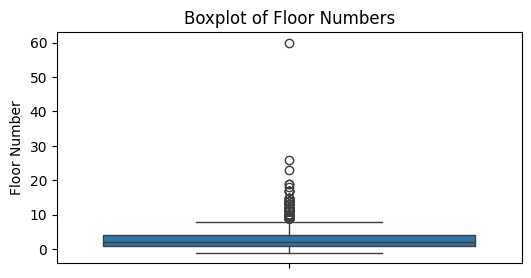

In [ ]:
# Plotting the boxplot for the 'inm_floor' column
plt.figure(figsize=(6, 3))
sns.boxplot(y=df['inm_floor'])
plt.title('Boxplot of Floor Numbers')
plt.ylabel('Floor Number')
plt.show()

Given the presence of outliers, using the median to impute missing values would be a better choice because the median is not affected by these extreme values as much as the mean would be. We can do so with the following.

In [ ]:
# For the training set
# Calculate the median of the 'inm_floor' column
floor_median = df['inm_floor'].median()
# Replace missing values with the median
df['inm_floor'].fillna(floor_median, inplace=True)

# For the test set
# Replace missing values with the median
test_df['inm_floor'].fillna(floor_median, inplace=True)

From our exploration, we know that size is also very important and as we have many missing values, we can also perform a check for that. Instead of checking for outliers now, we can check and see if the data is very skewed, indicating we would need to use median imputation.

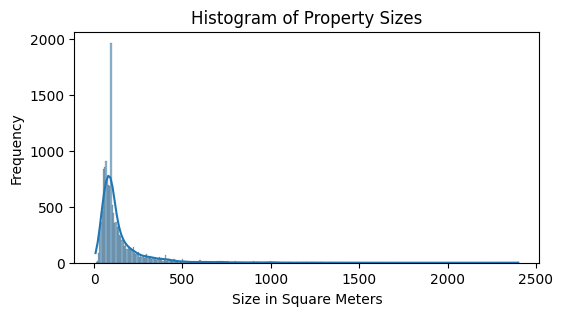

In [ ]:
# Plotting the histogram for the 'inm_size' column
plt.figure(figsize=(6, 3))
sns.histplot(df['inm_size'], kde=True)
plt.title('Histogram of Property Sizes')
plt.xlabel('Size in Square Meters')
plt.ylabel('Frequency')
plt.show()

And as we can see, it appears to be very skewed, hence we will do median imputation.

In [ ]:
# For the training set
# Calculate the median of the 'inm_size' column
size_median = df['inm_size'].median()
# Replace missing values with the median
df['inm_size'].fillna(size_median, inplace=True)

# For the test set
# Replace missing values with the median
test_df['inm_size'].fillna(size_median, inplace=True)

For inm_barrio and inm_distrito, as they are categorical values, we will use placeholder values of Unknown to fill them.

In [ ]:
# For the training set
# Fill missing values with "Unknown"
df['inm_barrio'].fillna('Unknown', inplace=True)
df['inm_distrito'].fillna('Unknown', inplace=True)

# For the test set
# Fill missing values with "Unknown"
test_df['inm_barrio'].fillna('Unknown', inplace=True)
test_df['inm_distrito'].fillna('Unknown', inplace=True)

When dealing with demographic proportions or populations, again median imputation is typically a good solution as its robust to outliers and skewed distributions. However, we will first check with boxplots for the features dem_PropConEstudiosUniversitarios and dem_EdadMedia

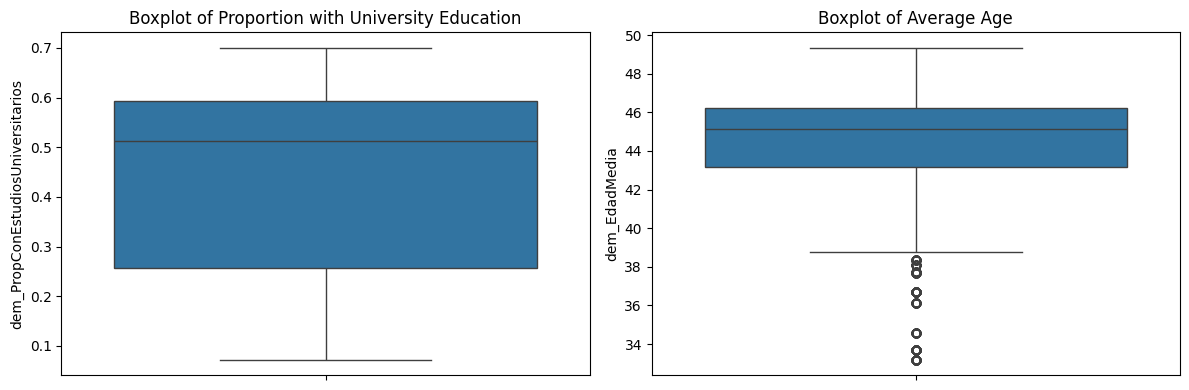

In [ ]:
# Plotting boxplots for 'dem_PropConEstudiosUniversitarios' and 'dem_EdadMedia'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot for 'dem_PropConEstudiosUniversitarios'
sns.boxplot(y=df['dem_PropConEstudiosUniversitarios'], ax=axes[0])
axes[0].set_title('Boxplot of Proportion with University Education')

# Boxplot for 'dem_EdadMedia'
sns.boxplot(y=df['dem_EdadMedia'], ax=axes[1])
axes[1].set_title('Boxplot of Average Age')

plt.tight_layout()
plt.show()

Based on above results, the first one doesn't have outliers and doesn't seem very skewed, so will use mean for that, and median for the second one.

In [ ]:
# For the training set
# Imputation for 'dem_PropConEstudiosUniversitarios' using the mean
prop_univ_mean = df['dem_PropConEstudiosUniversitarios'].mean()
df['dem_PropConEstudiosUniversitarios'].fillna(prop_univ_mean, inplace=True)
# Imputation for 'dem_EdadMedia' using the median
edad_media_median = df['dem_EdadMedia'].median()
df['dem_EdadMedia'].fillna(edad_media_median, inplace=True)

# For the test set
test_df['dem_PropConEstudiosUniversitarios'].fillna(prop_univ_mean, inplace=True)
test_df['dem_EdadMedia'].fillna(edad_media_median, inplace=True)

Lastly, we featured a new variable called the education_level_index which also has missing values. We will follow the same step to take care of that.

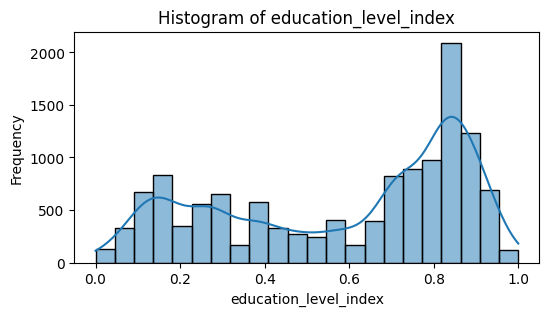

In [ ]:
# Plotting the histogram for the 'inm_size' column
plt.figure(figsize=(6, 3))
sns.histplot(df['education_level_index'], kde=True)
plt.title('Histogram of education_level_index')
plt.xlabel('education_level_index')
plt.ylabel('Frequency')
plt.show()

Based on the histogram, it looks like the data is not normally distributed; it has a peak towards the higher end of the index values. This kind of distribution appears to be left-skewed, meaning there are a tail and a higher frequency of data points towards the higher end of the scale.

As we've been operating for these situations, we will prefer the median over the mean for imputation because the mean is influenced by the skewness and might not represent the central tendency of the data accurately. The median, being the middle value, will not be as affected by the skew and will provide a more robust measure for central tendency in this case.

In [ ]:
# For the training set
# Calculate the median of the 'education_level_index' column
education = df['education_level_index'].median()
# Replace missing values with the median
df['education_level_index'].fillna(education, inplace=True)

# For the test set
# Replace missing values with the median
test_df['education_level_index'].fillna(education, inplace=True)

After completing all imputations and taking care of all missing values, we can do a final check to see that there are no missing values anymore

In [ ]:
print(df.isna().sum())
print(test_df.isna().sum())

inm_floor                                          0
inm_size                                           0
inm_price                                          0
inm_longitude                                      0
inm_latitude                                       0
inm_barrio                                         0
inm_distrito                                       0
his_price                                          0
his_quarterly_variation                            0
his_annual_variation                               0
his_monthly_variation                              0
dem_Indice_de_reemplazo_de_la_poblacion_activa     0
dem_Indice_de_juventud                             0
dem_Indice_de_estructura_de_la_poblacion_activa    0
dem_Indice_de_dependencia                          0
dem_TasaDeParo                                     0
dem_TamanoMedioDelHogar                            0
dem_PropSinEstudiosUniversitarios                  0
dem_PropSinEstudios                           

As we can see, all the missing values have been taken care of, in the training and testing df.

#### 2) Handling Categorical Variables
- We have seen before that we have 2 categorical variables that may be of relation with the target. However, since Machine Learning algorithms prefer to work with numbers, we will convert these categories from text to numbers.

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 29 numerical features : ['inm_floor', 'inm_size', 'inm_price', 'inm_longitude', 'inm_latitude', 'his_price', 'his_quarterly_variation', 'his_annual_variation', 'his_monthly_variation', 'dem_Indice_de_reemplazo_de_la_poblacion_activa', 'dem_Indice_de_juventud', 'dem_Indice_de_estructura_de_la_poblacion_activa', 'dem_Indice_de_dependencia', 'dem_TasaDeParo', 'dem_TamanoMedioDelHogar', 'dem_PropSinEstudiosUniversitarios', 'dem_PropSinEstudios', 'dem_Proporcion_de_nacidos_fuera_de_Espana', 'dem_PropConEstudiosUniversitarios', 'dem_PobTotal', 'dem_NumViviendas', 'dem_EdadMedia', 'dem_Densidad_(Habit/Ha)', 'size_category', 'education_level_index', 'household_size', 'population_foreign', 'composite_socioeconomic_score', 'historical_trend_score']

We have 2 categorical features : ['inm_barrio', 'inm_distrito']


In [ ]:
df.nunique()

inm_floor                                             23
inm_size                                             638
inm_price                                           2081
inm_longitude                                      12973
inm_latitude                                       13053
inm_barrio                                           122
inm_distrito                                          22
his_price                                            120
his_quarterly_variation                               70
his_annual_variation                                  89
his_monthly_variation                                 57
dem_Indice_de_reemplazo_de_la_poblacion_activa       121
dem_Indice_de_juventud                               121
dem_Indice_de_estructura_de_la_poblacion_activa      121
dem_Indice_de_dependencia                            121
dem_TasaDeParo                                       121
dem_TamanoMedioDelHogar                              121
dem_PropSinEstudiosUniversitari

From the outputs, our categorical variables have unique values as shown:

- inm_barrio                                           122
- inm_distrito                                          22

For distrcit, the variable with 22 unique values, they are nominal, so we will use one-hot encoding as the additional dimensions are not an issue for our dataset size.

For neighborhood, the variable with 122 unique values, using one-hot encoding would create many additional features, which could lead to high dimensionality and potentially cause issues like the curse of dimensionality or model overfitting. Hence we will use frequency encoding for it as it will keep the feature space manageable.


In [ ]:
# One-hot encoding for the 'district' column
train_one_hot = pd.get_dummies(df['inm_distrito'], prefix='inm_distrito')
test_one_hot = pd.get_dummies(test_df['inm_distrito'], prefix='inm_distrito')

# Align the one-hot encoded columns of train and test to ensure they have the same columns
train_one_hot, test_one_hot = train_one_hot.align(test_one_hot, join='left', axis=1, fill_value=0)

# Concatenate the one-hot encoded columns back to the original dataframes
df = pd.concat([df, train_one_hot], axis=1)
test_df = pd.concat([test_df, test_one_hot], axis=1)

# Drop the original 'inm_distrito' column as it's now one-hot encoded
df.drop('inm_distrito', axis=1, inplace=True)
test_df.drop('inm_distrito', axis=1, inplace=True)

# List of one-hot encoded columns to convert to integers
one_hot_columns = [col for col in df.columns if 'inm_distrito_' in col]

# Convert each boolean column to an integer type column
for col in one_hot_columns:
    df[col] = df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

# Frequency encoding for the 'inm_barrio' column
# Calculate frequencies
frequency = df['inm_barrio'].value_counts(normalize=True)

# Map frequencies to the train and test dataframes
df['inm_barrio_freq'] = df['inm_barrio'].map(frequency)
test_df['inm_barrio_freq'] = test_df['inm_barrio'].map(frequency).fillna(0)  # fill with 0 if not present in training

# Drop the original 'inm_barrio' column as it's now frequency encoded
df.drop('inm_barrio', axis=1, inplace=True)
test_df.drop('inm_barrio', axis=1, inplace=True)

# Now df and test_df have the 'inm_distrito' column one-hot encoded and 'inm_barrio' column frequency encoded

In [ ]:
print(df.shape[1] == test_df.shape[1])

True


#### 3) Feature Scaling
- In this step we will scale our values as we have very different scales in the features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# df and test_df are your training and testing data frames

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(df)

# Transform both train and test data
df_scaled = scaler.transform(df)
test_df_scaled = scaler.transform(test_df)

# Convert the scaled arrays back to a DataFrame (if needed)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df.columns)


In [ ]:
df_scaled.to_csv('../data/processed/processed_train_set.csv', index=False)
test_df_scaled.to_csv('../data/processed/processed_test_set.csv', index=False)

## Model Training
#### 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_36797/3906979114.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('../data/processed/processed_train_set.csv')
test_df = pd.read_csv('../data/processed/processed_test_set.csv')

In [ ]:
df.head(5)

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,inm_distrito_Retiro,inm_distrito_Salamanca,inm_distrito_San Blas - Canillejas,inm_distrito_Tetuán,inm_distrito_Unknown,inm_distrito_Usera,inm_distrito_Vicálvaro,inm_distrito_Villa de Vallecas,inm_distrito_Villaverde,inm_barrio_freq
0,0.032787,0.037625,0.028964,0.567127,0.336206,0.082037,0.561837,0.291667,0.481203,0.345298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165722
1,0.081967,0.052676,0.017285,0.233771,0.335341,0.127693,0.664311,0.236111,0.466165,0.161933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014873
2,0.065574,0.037625,0.005539,0.453518,0.270542,0.102154,0.579505,0.218750,0.473684,0.347480,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.037535
3,0.098361,0.052258,0.048986,0.448375,0.574744,0.493651,0.477032,0.211806,0.315789,0.132302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073654
4,0.016393,0.034699,0.026359,0.569365,0.508936,0.628763,0.657244,0.357639,0.466165,0.103351,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260623


In [ ]:
# Split your features and target variable
X_train = df.drop('inm_price', axis=1)
y_train = df['inm_price']
X_test = test_df.drop('inm_price', axis=1)
y_test = test_df['inm_price']

In [ ]:
y_train, y_test

(0        0.028964
 1        0.017285
 2        0.005539
 3        0.048986
 4        0.026359
            ...   
 14280    0.315937
 14281    0.008275
 14282    0.022224
 14283    0.058996
 14284    0.013281
 Name: inm_price, Length: 14285, dtype: float64,
 0       0.029632
 1       0.058329
 2       0.016584
 3       0.074012
 4       0.006841
           ...   
 3567    0.061666
 3568    0.007408
 3569    0.008943
 3570    0.044114
 3571    0.021289
 Name: inm_price, Length: 3572, dtype: float64)

#### Create an Evaluate Function to give all metrics after model Training

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBRegressor": XGBRegressor(),
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False), # Uncomment if CatBoost is installed and desired
    "AdaBoost Regressor": AdaBoostRegressor()
}


# Lists to store model names and R2 scores
model_list = []
r2_list = []

# Loop through models, fit, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0292
- Mean Absolute Error: 0.0147
- R2 Score: 0.7396
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0286
- Mean Absolute Error: 0.0146
- R2 Score: 0.7439


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.0572
- Mean Absolute Error: 0.0378
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0564
- Mean Absolute Error: 0.0375
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0292
- Mean Absolute Error: 0.0147
- R2 Score: 0.7394
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0285
- Mean Absolute Error: 0.0146
- R2 Score: 0.7453




/Users/adnanbhanji/Documents/GitHub/Madrid-Property-Analysis/venv/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0212
- Mean Absolute Error: 0.0096
- R2 Score: 0.8632
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0239
- Mean Absolute Error: 0.0119
- R2 Score: 0.8210


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0003
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0292
- Mean Absolute Error: 0.0116
- R2 Score: 0.7326


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0075
- Mean Absolute Error: 0.0032
- R2 Score: 0.9827
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0194
- Mean Absolute Error: 0.0086
- R2 Score: 0.8816


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0109
- Mean Absolute Error: 0.0060
- R2 Score: 0.9636
--

Based on the results above, here are some generalizations that we can make:

- Random Forest Regressor and XGBRegressor show the best overall performance among the models tested, with high R2 scores and low errors on both training and test sets. This indicates a strong predictive capability and generalization to unseen data.

- Decision Tree model shows perfect performance on the training set (R2 Score of 1.0000) but a significant drop in performance on the test set, indicating overfitting to the training data.

- K-Neighbors Regressor also performs well, particularly in reducing the Root Mean Squared Error (RMSE) and improving the R2 Score compared to linear models, suggesting that the relationship between features and target variable may not be linear.

- Linear Regression and Ridge have similar performance metrics, indicating a linear relationship between some of the predictors and the target variable. However, they are outperformed by ensemble and non-linear models.

- Lasso has the poorest performance with an R2 Score of 0.0000 on the training set and -0.0000 on the test set, which suggests that regularization penalized the model too much, leading to underfitting.

- AdaBoost Regressor shows moderate performance, better than Lasso but significantly lower than ensemble methods like Random Forest and XGBRegressor.

Model Choice:

For predicting inm_price, our target variable, the Random Forest Regressor and XGBRegressor are the best based on their strong performance on unseen data, balancing the trade-off between bias and variance effectively.

However, will choose the random forest regressor as it shows the most impressive results.


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0077
- Mean Absolute Error: 0.0033
- R2 Score: 0.9821
-----------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0205
- Mean Absolute Error: 0.0091
- R2 Score: 0.8676

The below code basically is for hyperparameter tuning of the random forest model, however since I already ran it and saw no improvements, I commented it out.

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Assuming X_train, X_test, y_train, y_test are already defined

# # Define the parameter grid for Random Forest Regressor
# param_grid = {
#     'n_estimators': [100, 200],  # Reduced number of options
#     'max_depth': [None, 20],  # Fewer options
#     'min_samples_split': [2, 10],  # Broader steps
#     'min_samples_leaf': [1, 4],  # Fewer options
#     'max_features': ['sqrt', 'log2']  # Adjusted to remove 'auto'
# }


# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Initialize the Grid Search model
# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=param_grid,
#                            cv=5,
#                            scoring='r2',
#                            n_jobs=-1,
#                            verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Retrieve the best model
# best_model = grid_search.best_estimator_

# # Making predictions with the best model
# y_train_pred = best_model.predict(X_train)
# y_test_pred = best_model.predict(X_test)

# # Define a function to evaluate the model
# def evaluate_model(true, predicted):
#     mae = mean_absolute_error(true, predicted)
#     mse = mean_squared_error(true, predicted)
#     rmse = np.sqrt(mse)
#     r2_square = r2_score(true, predicted)
#     return mae, rmse, r2_square

# # Evaluate the best model
# train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
# test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

# # Print model performance
# print('Model performance for Training set')
# print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
# print("- Mean Absolute Error: {:.4f}".format(train_mae))
# print("- R2 Score: {:.4f}".format(train_r2))

# print('----------------------------------')

# print('Model performance for Test set')
# print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
# print("- Mean Absolute Error: {:.4f}".format(test_mae))
# print("- R2 Score: {:.4f}".format(test_r2))


Hyperparam tuning didn't help. We can look at the least important features and remove the one's that aren't important to the model to see if that makes a difference.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Summarize feature importances in a DataFrame
features_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the DataFrame to identify least important features
features_df = features_df.sort_values(by='importance', ascending=True)

# Display the least important features
print(features_df)


                                            feature    importance
49                          inm_distrito_Villaverde  5.318221e-07
47                           inm_distrito_Vicálvaro  1.129543e-06
39                           inm_distrito_Moratalaz  1.634565e-06
48                   inm_distrito_Villa de Vallecas  2.264776e-06
46                               inm_distrito_Usera  2.474088e-06
40                  inm_distrito_Puente de Vallecas  3.067330e-06
37                              inm_distrito_Latina  4.287278e-06
30                         inm_distrito_Carabanchel  4.960220e-06
29                             inm_distrito_Barajas  7.513773e-06
28                          inm_distrito_Arganzuela  1.005930e-05
43               inm_distrito_San Blas - Canillejas  1.239808e-05
44                              inm_distrito_Tetuán  2.458143e-05
35               inm_distrito_Fuencarral - El Pardo  5.080581e-05
34                       inm_distrito_Ciudad Lineal  7.329639e-05
41        

In [ ]:
# Assuming features_df is sorted ascending by importance
threshold = features_df['importance'].quantile(0.01)  # Adjust quantile as needed
low_importance_features = features_df[features_df['importance'] <= threshold]['feature'].tolist()

X_train_filtered = X_train.drop(columns=low_importance_features)
X_test_filtered = X_test.drop(columns=low_importance_features)

# Retrain the model using the filtered datasets
model.fit(X_train_filtered, y_train)

# Evaluate the model
y_pred = model.predict(X_test_filtered)
print("R² on test set:", r2_score(y_test, y_pred))


R² on test set: 0.88304416460913


As seen above, the R2 value is similar, so we can just leave the values as they were, since there is barely any difference after dropping these.

In [ ]:
df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,inm_distrito_Retiro,inm_distrito_Salamanca,inm_distrito_San Blas - Canillejas,inm_distrito_Tetuán,inm_distrito_Unknown,inm_distrito_Usera,inm_distrito_Vicálvaro,inm_distrito_Villa de Vallecas,inm_distrito_Villaverde,inm_barrio_freq
0,0.032787,0.037625,0.028964,0.567127,0.336206,0.082037,0.561837,0.291667,0.481203,0.345298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165722
1,0.081967,0.052676,0.017285,0.233771,0.335341,0.127693,0.664311,0.236111,0.466165,0.161933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014873
2,0.065574,0.037625,0.005539,0.453518,0.270542,0.102154,0.579505,0.218750,0.473684,0.347480,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.037535
3,0.098361,0.052258,0.048986,0.448375,0.574744,0.493651,0.477032,0.211806,0.315789,0.132302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073654
4,0.016393,0.034699,0.026359,0.569365,0.508936,0.628763,0.657244,0.357639,0.466165,0.103351,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260623


## Madrid Property Analysis

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Data Split
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem statement
Here in the classification section, we have been given the liberty to conduct any classification exercise, based on the dataset we have been given. After looking at the dataset, some ideas that come to mind are:

- Investment Potential: Classify properties as "good investment" or "poor investment" based on historical price data and sociodemographic trends.  

- Price Category: Convert the continuous property price into categorical bins, such as "low", "medium", and "high".

- Market Segment: Classify properties into market segments, such as "luxury", "affordable", or "investment properties".

After brainstorming on ideas, I feel the best and most interesting problem to investigate could be to classify based on investment potential as we saw from the previous regression exercises that there are many labels on demographic data that can be very useful here. Hence our goal will be to use property, historical price, and sociodemographic trends from the dataset to classify the properties as excellent investment potential, good investment potential, moderate investment potential, and poor investment potential. (We will use numbers to represent these categories.)

NOTE: This file is setting up the data and understanding the basic data structure we have. It will be similar to the code in the regression section as we are only exploring the basic data currently, however will include the formation of the target variable and hence feature engineering too. From the next steps, consisting of EDA, data pre-processing, and the model, the content will different to abide by this specific problem statement.

#### 2) Data Collection
- Dataset Source - The dataset was provided to us and is located in the data/raw directory.
- The data consists of 17857 rows and 26 columns.

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit


Import the Excel Data as Pandas DataFrame

In [ ]:
df = pd.read_excel('../data/raw/session_7_dataset.xlsx')

##### 2.2 Dataset Information

Taking a Quick Look at the Data Structure

In [ ]:
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,...,8.724674,2.527886,0.488949,0.175632,15.456193,NaN,40838,16155,NaN,161.894356
1,1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2,NaN,NaN,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


In [ ]:
df.shape

(17857, 26)

Straight of the bat, we can see we have mix of both categorical and numerical data, and we can also see some NaN's in the first few rows. We will take care of this later, however we also notice we have several features of which we will determine their importance later in the model. In specific, this is what the columns represent:

 - Unnamed: 0: An index or identifier for the rows.
- inm_floor: The floor number on which the property is located.
- inm_size: The size of the property in square meters.
- inm_price: The listing price of the property.
- inm_longitude: The longitude coordinate of the property.
- inm_latitude: The latitude coordinate of the property.
- inm_barrio: The neighborhood name where the property is located.
- inm_distrito: The district name where the property is located.
- his_price: A historical pricing reference for the property.
- his_quarterly_variation: The change in price from the previous quarter.
- his_annual_variation: The change in price from the previous year.
- his_monthly_variation: The change in price from the previous month.
- dem_Indice_de_reemplazo_de_la_poblacion_activa: An index measuring the replacement rate of the working-age population.
- dem_Indice_de_juventud: An index measuring the youthfulness of the population.
- dem_Indice_de_estructura_de_la_poblacion_activa: An index reflecting the structure of the working-age population.
- dem_Indice_de_dependencia: An index measuring the dependency ratio in the population.
- dem_TasaDeParo: The unemployment rate in the area.
- dem_TamanoMedioDelHogar: The average household size.
- dem_PropSinEstudiosUniversitarios: The proportion of the population without university-level education.
- dem_PropSinEstudios: The proportion of the population without any educational qualifications.
- dem_Proporcion_de_nacidos_fuera_de_Espana: The proportion of the population born outside of Spain.
- dem_PropConEstudiosUniversitarios: The proportion of the population with university-level education.
- dem_PobTotal: The total population in the area.
- dem_NumViviendas: The total number of dwellings in the area.
- dem_EdadMedia: The average age of the population in the area.
- dem_Densidad_(Habit/Ha): The population density per hectare in the area.



We will take care of missing values and all later in the preprocessing state, but right now we will check them, however, we will get rid of the index column as it's not needed in our analysis.

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

#### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1 Check Missing Values

In [ ]:
# Check for missing values in the dfFrame
print(df.isnull().sum())

inm_floor                                          3790
inm_size                                           1767
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1794
inm_distrito                                       1747
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                               0
dem_PropSinEstudiosUniversitarios               

From the information above, we can notice that the inm_floor, inm_size, inm_barrio, inm_distrito, dem_PropConEstudiosUniversitarios, and dem_EdadMedia  features have missing values and for the floor its almost 1/6th of the dataset, and for others it's also quite a significant portion, so we will need to take care of this later in the processing.

##### 3.2 Check Duplicates

In [ ]:
df.duplicated().sum()

6

We can see there's no duplicates so we won't need to do anything related to duplicates from the raw dataset.

##### 3.3 Check Data Types

In [ ]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   inm_floor                                        14067 non-null  float64
 1   inm_size                                         16090 non-null  float64
 2   inm_price                                        17857 non-null  int64  
 3   inm_longitude                                    17857 non-null  float64
 4   inm_latitude                                     17857 non-null  float64
 5   inm_barrio                                       16063 non-null  object 
 6   inm_distrito                                     16110 non-null  object 
 7   his_price                                        17857 non-null  int64  
 8   his_quarterly_variation                          17857 non-null  float64
 9   his_annual_variation        

We can also see from the output above that we have int/float values which are our numerical variables, and we have 2 objects - inm_barrio, inm_distrito. Typically, an object could hold any kind of Python object, but since we loaded this data from an excel file, we know that it must be a text attribute.

##### 3.4 Checking the number of unique values of each column

In [ ]:
df.nunique()

inm_floor                                             23
inm_size                                             675
inm_price                                           2340
inm_longitude                                      16013
inm_latitude                                       16104
inm_barrio                                           121
inm_distrito                                          21
his_price                                            120
his_quarterly_variation                               70
his_annual_variation                                  89
his_monthly_variation                                 57
dem_Indice_de_reemplazo_de_la_poblacion_activa       121
dem_Indice_de_juventud                               121
dem_Indice_de_estructura_de_la_poblacion_activa      121
dem_Indice_de_dependencia                            121
dem_TasaDeParo                                       121
dem_TamanoMedioDelHogar                              121
dem_PropSinEstudiosUniversitari

##### 3.5 Check statistics of data set

In [ ]:
df.describe()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
count,14067.000000,16090.000000,1.785700e+04,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,...,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,16132.000000,17857.000000,17857.000000,16067.000000,17857.000000
mean,2.696453,149.013753,6.964702e+05,-3.688064,40.424817,3993.643389,0.437918,-1.814499,0.035549,58.387524,...,8.736896,2.487494,0.436518,0.124281,24.851753,0.439830,28281.995296,11515.008960,44.315032,233.372820
std,2.387135,160.485808,8.547274e+05,0.039164,0.031176,1589.895597,2.510048,3.847875,1.533065,23.241554,...,3.042722,0.300608,0.109068,0.076923,8.542049,0.181168,13117.299282,5322.072109,2.842113,122.653928
min,-1.000000,8.000000,1.600000e+04,-3.837697,40.328140,1290.000000,-16.100000,-11.600000,-5.200000,26.976744,...,3.643735,1.975877,0.246480,0.036422,8.884988,0.072421,2398.000000,872.000000,33.198916,2.267773
25%,1.000000,66.000000,1.899000e+05,-3.708170,40.402633,2578.000000,-1.100000,-4.300000,-0.600000,41.889843,...,6.291480,2.297491,0.340818,0.062095,18.746056,0.257582,18785.000000,8011.000000,43.161070,155.641754
50%,2.000000,98.000000,3.700000e+05,-3.692498,40.426586,4049.000000,0.500000,-2.200000,0.000000,51.910341,...,8.076921,2.466320,0.391468,0.085268,23.400147,0.512828,25023.000000,10637.000000,45.113343,228.165728
75%,4.000000,166.000000,8.490000e+05,-3.669516,40.446864,5106.000000,1.900000,-0.100000,0.900000,65.111111,...,10.802359,2.673612,0.551965,0.191202,31.219133,0.592631,36922.000000,15312.000000,46.244228,322.402577
max,60.000000,2400.000000,1.500000e+07,-3.545674,40.507659,8299.000000,12.200000,17.200000,8.100000,171.272727,...,18.030112,3.506552,0.641264,0.355659,53.296248,0.699977,67418.000000,26836.000000,49.332035,460.612389


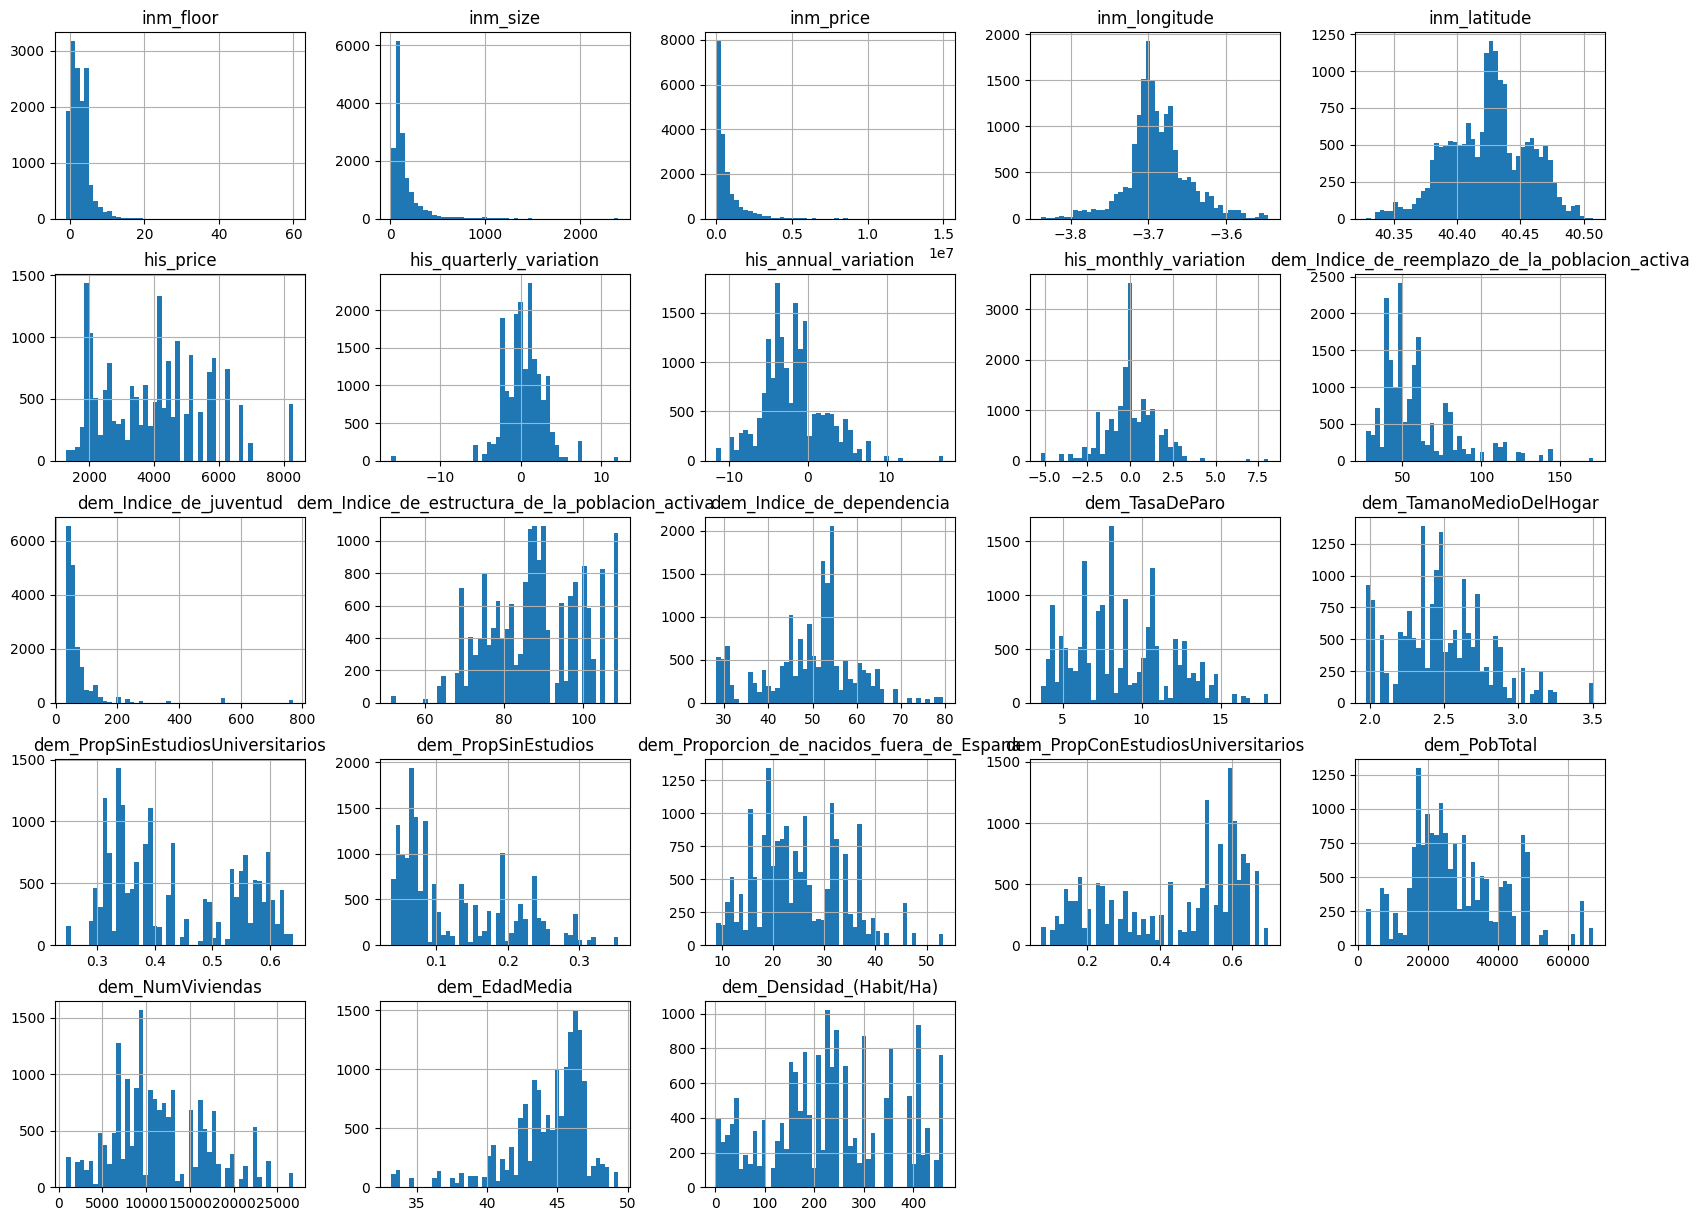

In [ ]:
# %matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Here are some inferences we can make from the above histograms and statistical data provided.

1. These attributes have very different scales, and we will take care of this while doing feature scaling.
2. We also notice that many histograms with the property related variables are tail-heavy: they extend much farther to the right of the median than to the left. We will try transforming these attributes later on to have more bell-shaped distributions. However, the demographic variables mostly seem to have average bell shaped distributions.
3. The presence of long tails in the histograms for property-related variables indicates potential outliers. We will Identify and handle these outliers for accurate modeling and analysis.

#### 4. Feature Engineering + Target Variable Creation

We would split the data now, but we need to create our target variable first, and then we will split it.

We will define our criteria that defines what makes an investment good or bad (these are not the classification types, we have 4 classification categories mentioned below). We will largely use domain knowledge, and combine it with the historical price appreciation and sociodemographic indicators.

- To calculate historical price appreciation we will first get the historical price data at two different time points, and calculate the annualized rate of return as follows: df['annualized_return'] = (current_prices / historical_prices) ** (1 / years_elapsed) - 1
- Then we will choose a sociodemographic indicator that correlates with property investment potential.
- Lastly, we will combine the annualized return and the sociodemographic score into a composite score.

With this information, we will be able to classify as good or poor investment. We will use this criteria:
- Excellent Investment: Above the 75th percentile
- Good Investment: Between the 50th and 75th percentile
- Moderate Investment: Between the 25th and 50th percentile
- Poor Investment: Below the 25th percentile



In [ ]:
years_elapsed = 1

# Normalize 'inm_price' and 'his_price' using Min-Max scaling
df['inm_price_norm'] = (df['inm_price'] - df['inm_price'].min()) / (df['inm_price'].max() - df['inm_price'].min())
df['his_price_norm'] = (df['his_price'] - df['his_price'].min()) / (df['his_price'].max() - df['his_price'].min())

# Calculate the annualized return using normalized prices
df['annualized_return'] = (df['inm_price_norm'] / df['his_price_norm']) ** (1 / years_elapsed) - 1


# Normalizing the variables (subtracting the mean and dividing by the standard deviation)
df['education_normalized'] = (df['dem_PropConEstudiosUniversitarios'] - df['dem_PropConEstudiosUniversitarios'].mean()) / df['dem_PropConEstudiosUniversitarios'].std()
df['youth_index_normalized'] = (df['dem_Indice_de_juventud'] - df['dem_Indice_de_juventud'].mean()) / df['dem_Indice_de_juventud'].std()
df['dependency_index_normalized'] = (df['dem_Indice_de_dependencia'] - df['dem_Indice_de_dependencia'].mean()) / df['dem_Indice_de_dependencia'].std()
df['population_density_normalized'] = (df['dem_Densidad_(Habit/Ha)'] - df['dem_Densidad_(Habit/Ha)'].mean()) / df['dem_Densidad_(Habit/Ha)'].std()

# Combine the normalized factors into a single socioeconomic score
factors = ['education_normalized', 'youth_index_normalized', 'dependency_index_normalized', 'population_density_normalized']
df['socioeconomic_score'] = df[factors].mean(axis=1)

# Now continue with the investment score calculation as before
w1, w2 = 0.7, 0.3  # Weights for the annualized return and socioeconomic score
df['investment_score'] = w1 * df['annualized_return'] + w2 * df['socioeconomic_score']

df.drop(['inm_price_norm', 'his_price_norm', 'education_normalized',
         'youth_index_normalized', 'dependency_index_normalized', 'population_density_normalized'], axis=1, inplace=True)

# Determine the percentiles
percentile_25 = df['investment_score'].quantile(0.25)
percentile_50 = df['investment_score'].quantile(0.50)
percentile_75 = df['investment_score'].quantile(0.75)

# Categorize properties based on investment score percentiles and assign numeric labels
conditions = [
    df['investment_score'] > percentile_75,
    (df['investment_score'] <= percentile_75) & (df['investment_score'] > percentile_50),
    (df['investment_score'] <= percentile_50) & (df['investment_score'] > percentile_25),
    df['investment_score'] <= percentile_25
]

choices = [3, 2, 1, 0]  # Numeric labels for Excellent=3, Good=2, Moderate=1, Poor=0

df['investment_category'] = np.select(conditions, choices)

# Check the distribution of the new investment categories
investment_category_distribution = df['investment_category'].value_counts().sort_index()

investment_category_distribution

investment_category
0    4467
1    4462
2    4464
3    4464
Name: count, dtype: int64

From this, we can see an equal split among the categories which is ideal for us and we can now go ahead to splitting our dataset into train and test sets.

#### 5. Train Test Split


We will be splitting the data into training and testing sets. Spliiting the data at this point will help us to avoid data leakage, data snooping and overfitting.
We will use the training set to train the model and the testing set to evaluate the model.

Given that now we have a classification problem with evenly distributed classes, using stratified sampling for our train-test split is a good practice. Stratified sampling will ensure that our train and test sets have the same proportion of each category as the original dataset, which is particularly important in classification problems to prevent introducing bias into our model.

Since we've categorized your properties into four investment categories (0: Poor, 1: Moderate, 2: Good, 3: Excellent), it makes sense to stratify based on the investment_category column. This ensures that each split reflects the overall distribution of the investment potential categories.

In [ ]:
# Now we perform stratified sampling based on the size category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['investment_category']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# The resulting 'strat_train_set' and 'strat_test_set' will maintain the distribution of investment_category
# Let's check the distribution of the size investment_category in the stratified train set
print(strat_train_set['investment_category'].value_counts(normalize=True))
print(strat_test_set['investment_category'].value_counts(normalize=True))

# Save the stratified train and test sets as CSV files
strat_train_set.to_csv('../data/split/stratified_train_set.csv', index=False)
strat_test_set.to_csv('../data/split/stratified_test_set.csv', index=False)

investment_category
0    0.250123
3    0.249982
2    0.249982
1    0.249912
Name: proportion, dtype: float64
investment_category
0    0.25028
3    0.25000
2    0.25000
1    0.24972
Name: proportion, dtype: float64


## Madrid Property Analysis

We have already done the feature engineering in the section above, so here we will explore some data, and move on to the model

#### 1) Exploratory Data Analysis
- In this step we will discover and visualize the data deeper to gain insights and check for correlations.

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_16958/1254213584.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('../data/split/stratified_train_set.csv')

In [ ]:
df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,his_annual_variation,...,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),annualized_return,socioeconomic_score,investment_score,investment_category
0,3.0,93.0,529000,-3.676820,40.456285,Hispanoamérica,NaN,5202,2.4,-0.7,...,13.725735,0.621697,32042,12461,45.940516,187.104041,-0.938660,0.489241,-0.510289,3
1,1.0,65.0,174000,-3.623735,40.382615,Casco Histórico de Vallecas,Villa de Vallecas,1861,-1.3,-6.6,...,25.380897,0.113811,40956,14957,41.370373,9.514498,-0.870566,-0.837298,-0.860586,0
2,14.0,203.0,1425000,-3.688501,40.453925,Hispanoamérica,Chamartín,5202,2.4,-0.7,...,13.725735,0.621697,32042,12461,45.940516,187.104041,-0.831523,0.489241,-0.435294,3
3,2.0,138.0,420700,-3.585459,40.470546,Timón,Barajas,2963,-0.7,-1.2,...,16.750953,0.389932,12853,4755,38.088034,25.229337,-0.886847,-0.238059,-0.692211,1
4,4.0,93.0,850000,-3.654132,40.456655,San Juan Bautista,Ciudad Lineal,4275,2.3,2.0,...,16.243615,0.598292,12725,4939,44.283418,125.884877,-0.869308,0.204710,-0.547102,2


In [ ]:
df.shape

(14285, 29)

Our dataset is now smaller, as expected as we have made the split and are currently only exploring the training dataset. We have alot of columns we can potentially explore and we will start by exploring features that have potential for good investment.

##### 1.1 Visualizing Target Variable Distribution

Since we created the target variable with features, we will now visualize the distribution it - 'investment_category'

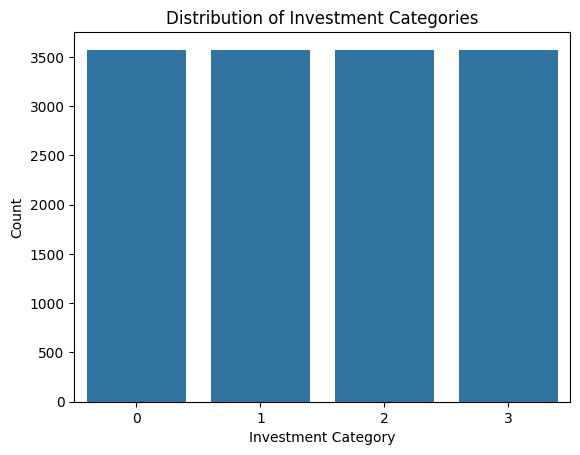

In [ ]:
sns.countplot(x='investment_category', data=df)
plt.title('Distribution of Investment Categories')
plt.xlabel('Investment Category')
plt.ylabel('Count')
plt.show()

We can see that our investment_category data is evenly distributed.

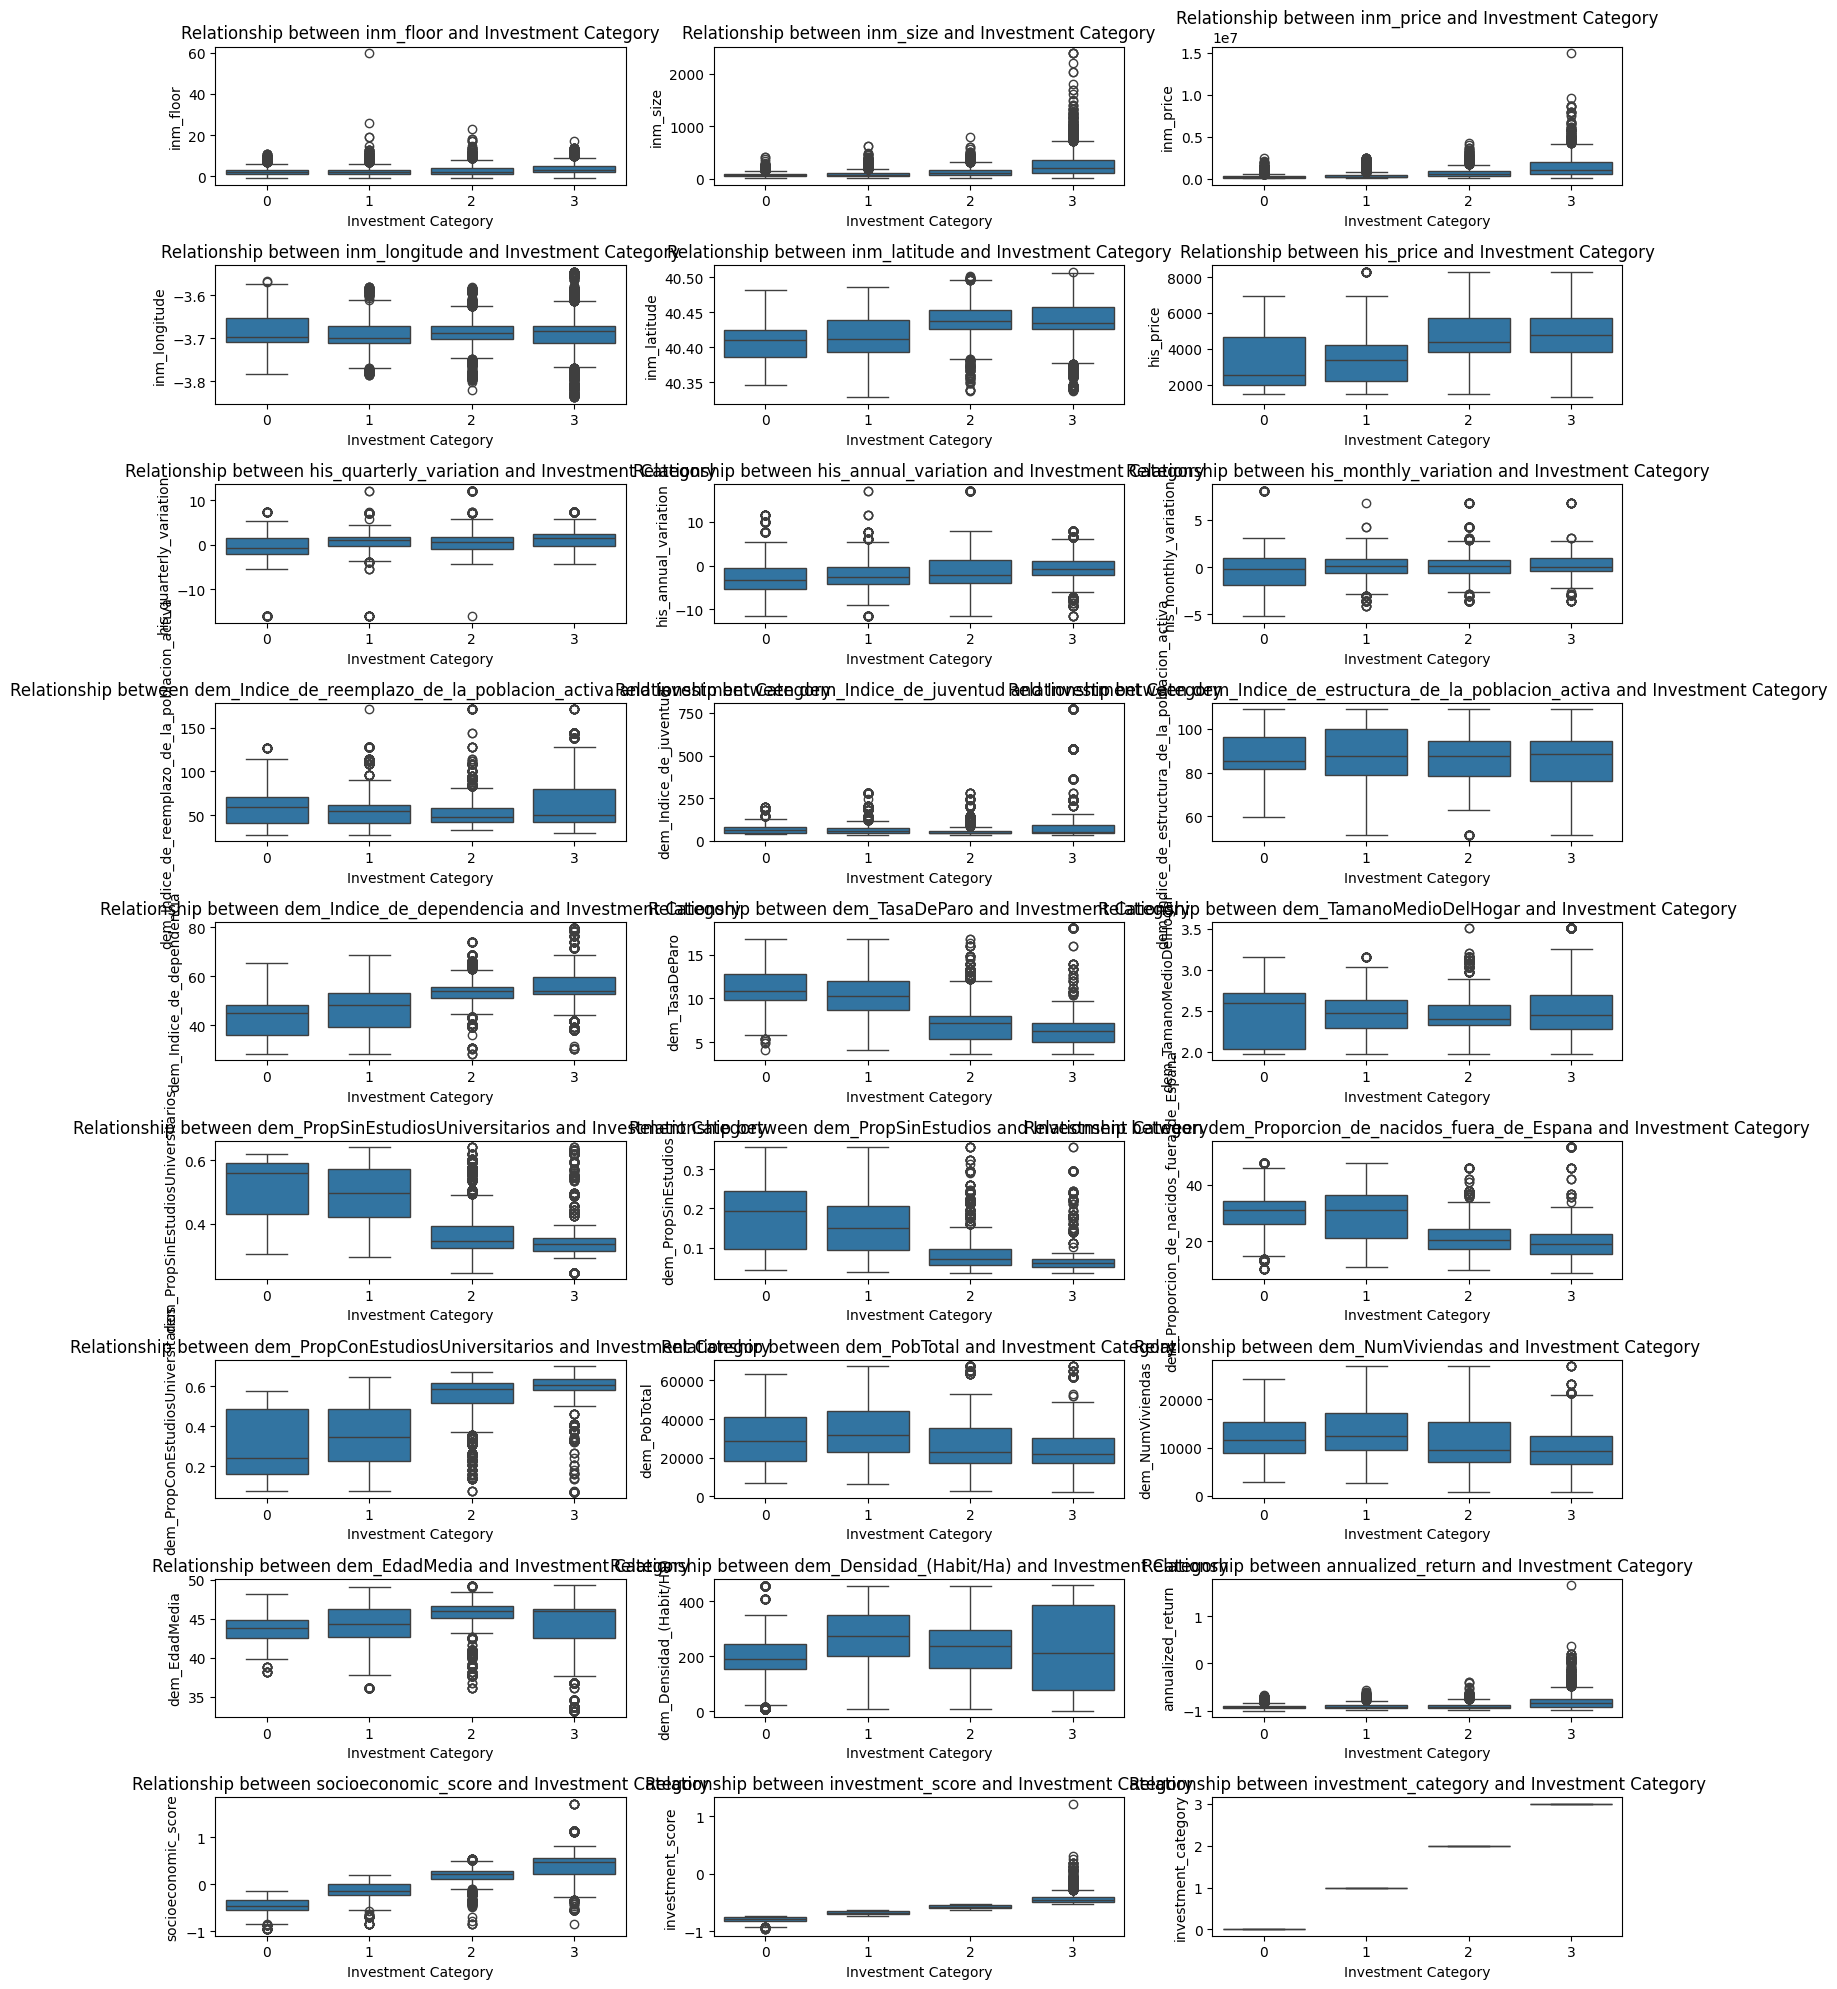

In [ ]:
import math

# Visualize the relationships between all numeric features and the target variable
numeric_features = df.select_dtypes(include=np.number).columns.tolist()  # Get all numeric columns

# Calculate the number of rows and columns for the grid layout
num_features = len(numeric_features)
rows = math.ceil(num_features / 3)
cols = min(num_features, 3)

# Adjust the size of the plots
plt.figure(figsize=(15, 20))

# Loop through each numeric feature and create a boxplot
for i, feature in enumerate(numeric_features, start=1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='investment_category', y=feature, data=df)
    plt.title(f'Relationship between {feature} and Investment Category')
    plt.xlabel('Investment Category')
    plt.ylabel(feature)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The boxplots indicate that larger property sizes and higher historical prices are associated with higher investment categories, while the geographical location (longitude and latitude) shows little variation across categories. Outliers suggest variability in floor count and historical price trends.

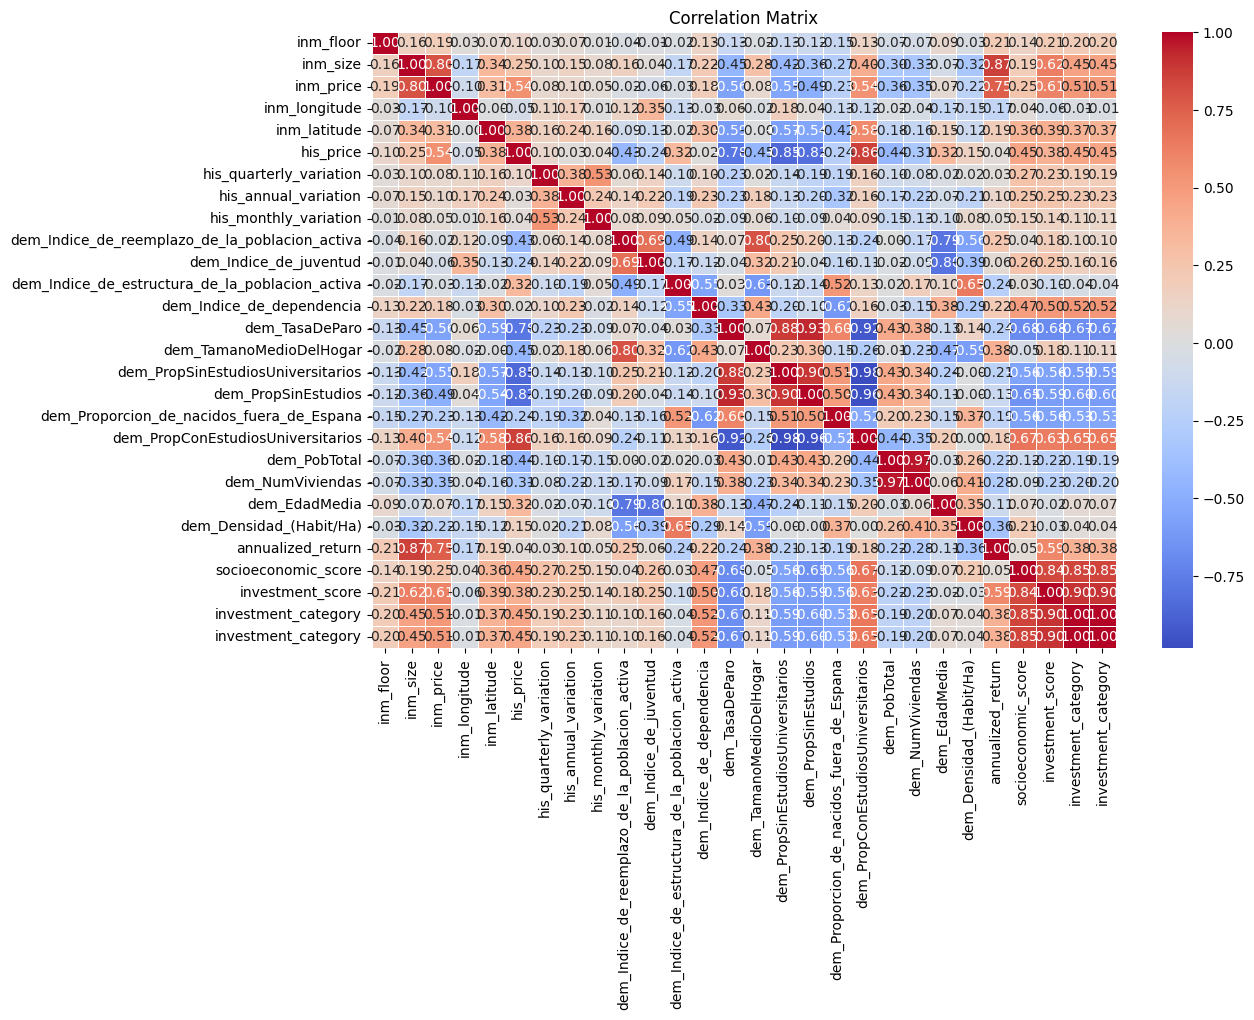

In [ ]:
# Visualize the correlation matrix
correlation_matrix = df[numeric_features + ['investment_category']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Based on this, we can see variables that relate with our investment category, such as the ones we featured including the investment score, socioeconomic score, annualized return etc.

## Madrid Property Analysis

#### 1) Data Cleaning
- In this step we will clean our data. This includes taking care of missing values, duplicates, etc. We already did the checks in the start, so we know we don't have duplicates. We only need to take care of the missing values.

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_38170/3606217804.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('../data/split/stratified_train_set.csv')
test_df = pd.read_csv('../data/split/stratified_test_set.csv')

We did this check to see the null values, and we can do it again just to refresh the data on the missing values.

In [ ]:
# Check for missing values in the dfFrame
print(df.isnull().sum())

inm_floor                                          3030
inm_size                                           1417
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1431
inm_distrito                                       1384
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                               0
dem_PropSinEstudiosUniversitarios               

Due to it being a significant amount of data, removing the rows or dropping the columns due to their importance is not a wise choice, hence we will go ahead with deciding which imputation to do.

- Mean / Median Imputation: For the numerical values, the mean/median imputation is one of the best techniques. Choosing which one from those will depend on how the data is skewed/ with outliers, (we will make plots to visalize that)

- For categorical values, we can fill with placeholders for now and then transform them to numerical values later on.

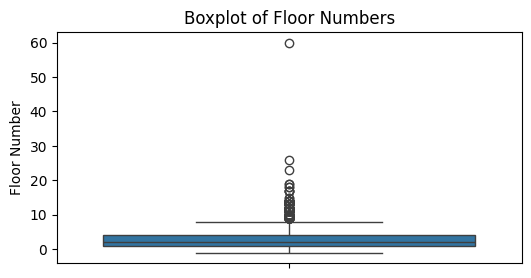

In [ ]:
# Plotting the boxplot for the 'inm_floor' column
plt.figure(figsize=(6, 3))
sns.boxplot(y=df['inm_floor'])
plt.title('Boxplot of Floor Numbers')
plt.ylabel('Floor Number')
plt.show()

Given the presence of outliers, using the median to impute missing values would be a better choice because the median is not affected by these extreme values as much as the mean would be. We can do so with the following.

In [ ]:
# For the training set
# Calculate the median of the 'inm_floor' column
floor_median = df['inm_floor'].median()
# Replace missing values with the median
df['inm_floor'].fillna(floor_median, inplace=True)

# For the test set
# Replace missing values with the median
test_df['inm_floor'].fillna(floor_median, inplace=True)

From our exploration, we know that size is also very important and as we have many missing values, we can also perform a check for that. Instead of checking for outliers now, we can check and see if the data is very skewed, indicating we would need to use median imputation.

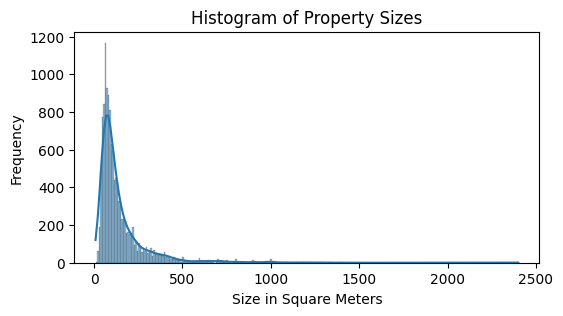

In [ ]:
# Plotting the histogram for the 'inm_size' column
plt.figure(figsize=(6, 3))
sns.histplot(df['inm_size'], kde=True)
plt.title('Histogram of Property Sizes')
plt.xlabel('Size in Square Meters')
plt.ylabel('Frequency')
plt.show()

And as we can see, it appears to be very skewed, hence we will do median imputation.

In [ ]:
# For the training set
# Calculate the median of the 'inm_size' column
size_median = df['inm_size'].median()
# Replace missing values with the median
df['inm_size'].fillna(size_median, inplace=True)

# For the test set
# Replace missing values with the median
test_df['inm_size'].fillna(size_median, inplace=True)

For inm_barrio and inm_distrito, as they are categorical values, we will use placeholder values of Unknown to fill them.

In [ ]:
# For the training set
# Fill missing values with "Unknown"
df['inm_barrio'].fillna('Unknown', inplace=True)
df['inm_distrito'].fillna('Unknown', inplace=True)

# For the test set
# Fill missing values with "Unknown"
test_df['inm_barrio'].fillna('Unknown', inplace=True)
test_df['inm_distrito'].fillna('Unknown', inplace=True)

When dealing with demographic proportions or populations, again median imputation is typically a good solution as its robust to outliers and skewed distributions. However, we will first check with boxplots for the features dem_PropConEstudiosUniversitarios and dem_EdadMedia

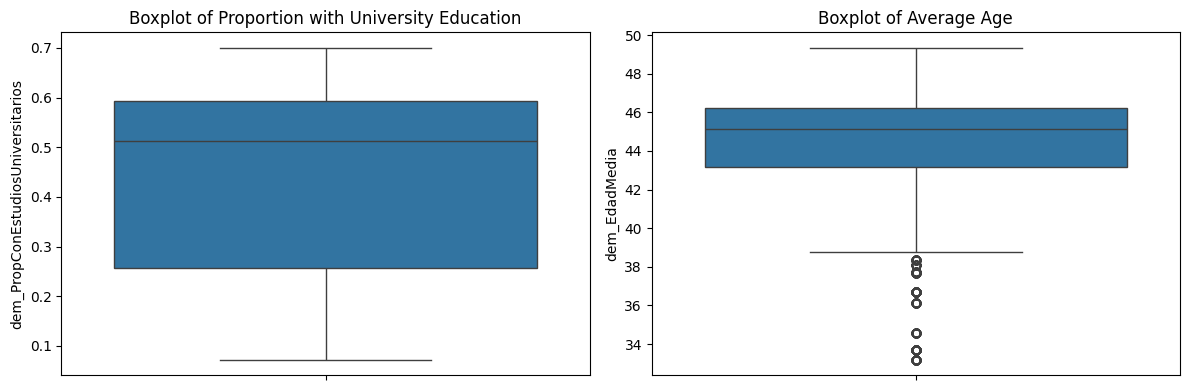

In [ ]:
# Plotting boxplots for 'dem_PropConEstudiosUniversitarios' and 'dem_EdadMedia'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot for 'dem_PropConEstudiosUniversitarios'
sns.boxplot(y=df['dem_PropConEstudiosUniversitarios'], ax=axes[0])
axes[0].set_title('Boxplot of Proportion with University Education')

# Boxplot for 'dem_EdadMedia'
sns.boxplot(y=df['dem_EdadMedia'], ax=axes[1])
axes[1].set_title('Boxplot of Average Age')

plt.tight_layout()
plt.show()

Based on above results, the first one doesn't have outliers and doesn't seem very skewed, so will use mean for that, and median for the second one.

In [ ]:
# For the training set
# Imputation for 'dem_PropConEstudiosUniversitarios' using the mean
prop_univ_mean = df['dem_PropConEstudiosUniversitarios'].mean()
df['dem_PropConEstudiosUniversitarios'].fillna(prop_univ_mean, inplace=True)
# Imputation for 'dem_EdadMedia' using the median
edad_media_median = df['dem_EdadMedia'].median()
df['dem_EdadMedia'].fillna(edad_media_median, inplace=True)

# For the test set
test_df['dem_PropConEstudiosUniversitarios'].fillna(prop_univ_mean, inplace=True)
test_df['dem_EdadMedia'].fillna(edad_media_median, inplace=True)

After completing all imputations and taking care of all missing values, we can do a final check to see that there are no missing values anymore

In [ ]:
print(df.isna().sum())
print(test_df.isna().sum())

inm_floor                                          0
inm_size                                           0
inm_price                                          0
inm_longitude                                      0
inm_latitude                                       0
inm_barrio                                         0
inm_distrito                                       0
his_price                                          0
his_quarterly_variation                            0
his_annual_variation                               0
his_monthly_variation                              0
dem_Indice_de_reemplazo_de_la_poblacion_activa     0
dem_Indice_de_juventud                             0
dem_Indice_de_estructura_de_la_poblacion_activa    0
dem_Indice_de_dependencia                          0
dem_TasaDeParo                                     0
dem_TamanoMedioDelHogar                            0
dem_PropSinEstudiosUniversitarios                  0
dem_PropSinEstudios                           

As we can see, all the missing values have been taken care of, in the training and testing df.

#### 2) Handling Categorical Variables
- We have seen before that we have 2 categorical variables that may be of relation with the target. However, since Machine Learning algorithms prefer to work with numbers, we will convert these categories from text to numbers.

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 27 numerical features : ['inm_floor', 'inm_size', 'inm_price', 'inm_longitude', 'inm_latitude', 'his_price', 'his_quarterly_variation', 'his_annual_variation', 'his_monthly_variation', 'dem_Indice_de_reemplazo_de_la_poblacion_activa', 'dem_Indice_de_juventud', 'dem_Indice_de_estructura_de_la_poblacion_activa', 'dem_Indice_de_dependencia', 'dem_TasaDeParo', 'dem_TamanoMedioDelHogar', 'dem_PropSinEstudiosUniversitarios', 'dem_PropSinEstudios', 'dem_Proporcion_de_nacidos_fuera_de_Espana', 'dem_PropConEstudiosUniversitarios', 'dem_PobTotal', 'dem_NumViviendas', 'dem_EdadMedia', 'dem_Densidad_(Habit/Ha)', 'annualized_return', 'socioeconomic_score', 'investment_score', 'investment_category']

We have 2 categorical features : ['inm_barrio', 'inm_distrito']


In [ ]:
df.nunique()

inm_floor                                             23
inm_size                                             650
inm_price                                           2106
inm_longitude                                      12960
inm_latitude                                       13029
inm_barrio                                           122
inm_distrito                                          22
his_price                                            120
his_quarterly_variation                               70
his_annual_variation                                  89
his_monthly_variation                                 57
dem_Indice_de_reemplazo_de_la_poblacion_activa       121
dem_Indice_de_juventud                               121
dem_Indice_de_estructura_de_la_poblacion_activa      121
dem_Indice_de_dependencia                            121
dem_TasaDeParo                                       121
dem_TamanoMedioDelHogar                              121
dem_PropSinEstudiosUniversitari

From the outputs, our categorical variables have unique values as shown:

- inm_barrio                                           122
- inm_distrito                                          22

For distrcit, the variable with 22 unique values, they are nominal, so we will use one-hot encoding as the additional dimensions are not an issue for our dataset size.

For neighborhood, the variable with 122 unique values, using one-hot encoding would create many additional features, which could lead to high dimensionality and potentially cause issues like the curse of dimensionality or model overfitting. Hence we will use frequency encoding for it as it will keep the feature space manageable.


In [ ]:
# One-hot encoding for the 'district' column
train_one_hot = pd.get_dummies(df['inm_distrito'], prefix='inm_distrito')
test_one_hot = pd.get_dummies(test_df['inm_distrito'], prefix='inm_distrito')

# Align the one-hot encoded columns of train and test to ensure they have the same columns
train_one_hot, test_one_hot = train_one_hot.align(test_one_hot, join='left', axis=1, fill_value=0)

# Concatenate the one-hot encoded columns back to the original dataframes
df = pd.concat([df, train_one_hot], axis=1)
test_df = pd.concat([test_df, test_one_hot], axis=1)

# Drop the original 'inm_distrito' column as it's now one-hot encoded
df.drop('inm_distrito', axis=1, inplace=True)
test_df.drop('inm_distrito', axis=1, inplace=True)

# List of one-hot encoded columns to convert to integers
one_hot_columns = [col for col in df.columns if 'inm_distrito_' in col]

# Convert each boolean column to an integer type column
for col in one_hot_columns:
    df[col] = df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

# Frequency encoding for the 'inm_barrio' column
# Calculate frequencies
frequency = df['inm_barrio'].value_counts(normalize=True)

# Map frequencies to the train and test dataframes
df['inm_barrio_freq'] = df['inm_barrio'].map(frequency)
test_df['inm_barrio_freq'] = test_df['inm_barrio'].map(frequency).fillna(0)  # fill with 0 if not present in training

# Drop the original 'inm_barrio' column as it's now frequency encoded
df.drop('inm_barrio', axis=1, inplace=True)
test_df.drop('inm_barrio', axis=1, inplace=True)

# Now df and test_df have the 'inm_distrito' column one-hot encoded and 'inm_barrio' column frequency encoded

In [ ]:
print(df.shape[1] == test_df.shape[1])

True


#### 2) Feature Scaling
- In this step we will scale our values as we have very different scales in the features.

In [ ]:
test_df.max().to_frame().T
# pd.DataFrame(df.max()).T

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,inm_distrito_Retiro,inm_distrito_Salamanca,inm_distrito_San Blas - Canillejas,inm_distrito_Tetuán,inm_distrito_Unknown,inm_distrito_Usera,inm_distrito_Vicálvaro,inm_distrito_Villa de Vallecas,inm_distrito_Villaverde,inm_barrio_freq
0,17.0,2400.0,9100000.0,-3.547698,40.506627,8299.0,12.2,17.2,8.1,171.272727,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.100175


In [ ]:
# Check for infinities in your DataFrame
print(test_df.isin([np.inf, -np.inf]).sum())


inm_floor                                           0
inm_size                                            0
inm_price                                           0
inm_longitude                                       0
inm_latitude                                        0
his_price                                           0
his_quarterly_variation                             0
his_annual_variation                                0
his_monthly_variation                               0
dem_Indice_de_reemplazo_de_la_poblacion_activa      0
dem_Indice_de_juventud                              0
dem_Indice_de_estructura_de_la_poblacion_activa     0
dem_Indice_de_dependencia                           0
dem_TasaDeParo                                      0
dem_TamanoMedioDelHogar                             0
dem_PropSinEstudiosUniversitarios                   0
dem_PropSinEstudios                                 0
dem_Proporcion_de_nacidos_fuera_de_Espana           0
dem_PropConEstudiosUniversit

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
test_df.dropna(inplace=True)

In [ ]:
# Select features only, excluding the target variable for scaling
features = df.drop('investment_category', axis=1)
test_features = test_df.drop('investment_category', axis=1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data features only
scaler.fit(features)

# Transform the features of both train and test data
df_scaled_features = scaler.transform(features)
test_df_scaled_features = scaler.transform(test_features)

# Convert the scaled arrays back to a DataFrame and include the target variable
df_scaled = pd.DataFrame(df_scaled_features, columns=features.columns, index=df.index)
test_df_scaled = pd.DataFrame(test_df_scaled_features, columns=test_features.columns, index=test_df.index)

# Add the target variable back into the scaled DataFrames
df_scaled['investment_category'] = df['investment_category']
test_df_scaled['investment_category'] = test_df['investment_category']

In [ ]:
df_scaled.to_csv('../data/processed/processed_train_set.csv', index=False)
test_df_scaled.to_csv('../data/processed/processed_test_set.csv', index=False)

## Model Training
#### 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, Perceptron  # Import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('../data/processed/processed_train_set.csv')
test_df = pd.read_csv('../data/processed/processed_test_set.csv')

In [ ]:
df.head(5)

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,inm_distrito_Salamanca,inm_distrito_San Blas - Canillejas,inm_distrito_Tetuán,inm_distrito_Unknown,inm_distrito_Usera,inm_distrito_Vicálvaro,inm_distrito_Villa de Vallecas,inm_distrito_Villaverde,inm_barrio_freq,investment_category
0,0.065574,0.035535,0.034237,0.550904,0.713824,0.545495,0.653710,0.378472,0.360902,0.175559,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.062720,3
1,0.032787,0.023829,0.010545,0.732688,0.303448,0.055181,0.522968,0.173611,0.000000,0.411872,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.071882,0
2,0.245902,0.081522,0.094034,0.510904,0.700679,0.545495,0.653710,0.378472,0.360902,0.175559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062720,3
3,0.049180,0.054348,0.027009,0.863763,0.793266,0.216906,0.544170,0.361111,0.157895,0.439892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016209,1
4,0.081967,0.035535,0.055659,0.628597,0.715885,0.409451,0.650177,0.472222,0.526316,0.392145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038055,2


#### 1.2 Split Data

In [ ]:
X_train = df.drop('investment_category', axis=1)
y_train = df['investment_category'].astype('category')
X_test = test_df.drop('investment_category', axis=1)
y_test = test_df['investment_category'].astype('category')

In [ ]:
# Check the distribution of unique values in the 'investment_category' column
class_distribution = df['investment_category'].value_counts()
# Print the distribution
print(class_distribution)
# Check the data type of the 'investment_category' column
print(df['investment_category'].dtype)

investment_category
0    3573
2    3571
1    3570
3    3500
Name: count, dtype: int64
int64


We will explore a bunch of classification algorithms and see which ones perform best, similar to the method we followed for the regression. We have different metrics here compared to the regression as we evaluate differently. Some are the accuracy, precision, and f1 score.

#### 1.3 Train Data

In [ ]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

# Dictionary of models for classification
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBClassifier": XGBClassifier(),
    # "CatBoosting Classifier": CatBoostClassifier(verbose=False), # Uncomment if CatBoost is installed and desired
    "AdaBoost Classifier": AdaBoostClassifier(),
    "SVC": SVC(),
    "Perceptron": Perceptron()  # Add Perceptron to the models
}

# Lists to store model names and scores
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Loop through models, fit, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)
    test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_accuracy))
    print("- Precision: {:.4f}".format(train_precision))
    print("- Recall: {:.4f}".format(train_recall))
    print("- F1 Score: {:.4f}".format(train_f1))
    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(test_accuracy))
    print("- Precision: {:.4f}".format(test_precision))
    print("- Recall: {:.4f}".format(test_recall))
    print("- F1 Score: {:.4f}".format(test_f1))
    accuracy_list.append(test_accuracy)
    precision_list.append(test_precision)
    recall_list.append(test_recall)
    f1_list.append(test_f1)

    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.8811
- Precision: 0.8822
- Recall: 0.8811
- F1 Score: 0.8815
----------------------------------
Model performance for Test set
- Accuracy: 0.8715
- Precision: 0.8730
- Recall: 0.8715
- F1 Score: 0.8721


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9331
- Precision: 0.9334
- Recall: 0.9331
- F1 Score: 0.9331
----------------------------------
Model performance for Test set
- Accuracy: 0.8943
- Precision: 0.8948
- Recall: 0.8943
- F1 Score: 0.8943


Decision Tree Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
----------------------------------
Mod

/Users/adnanbhanji/Documents/GitHub/Madrid-Property-Analysis/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/adnanbhanji/Documents/GitHub/Madrid-Property-Analysis/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adnanbhanji/Documents/GitHub/Madrid-Property-Analysis/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.7488
- Precision: 0.6232
- Recall: 0.7488
- F1 Score: 0.6651
----------------------------------
Model performance for Test set
- Accuracy: 0.7492
- Precision: 0.6238
- Recall: 0.7492
- F1 Score: 0.6656


SVC
Model performance for Training set
- Accuracy: 0.8645
- Precision: 0.8653
- Recall: 0.8645
- F1 Score: 0.8648
----------------------------------
Model performance for Test set
- Accuracy: 0.8592
- Precision: 0.8607
- Recall: 0.8592
- F1 Score: 0.8596


Perceptron
Model performance for Training set
- Accuracy: 0.8219
- Precision: 0.8374
- Recall: 0.8219
- F1 Score: 0.8255
----------------------------------
Model performance for Test set
- Accuracy: 0.8220
- Precision: 0.8369
- Recall: 0.8220
- F1 Score: 0.8255




Based on the performance metrics provided, the K-Nearest Neighbors (KNN) Classifier and Logistic Regression emerge as the most suitable models for the Madrid Property Analysis project. These models exhibit a strong balance between accuracy, precision, recall, and F1 score on both the training and test sets, indicating good generalization without overfitting. Specifically, the KNN model shows superior performance metrics on the test set with an accuracy of 0.8943, precision of 0.8948, recall of 0.8943, and an F1 score of 0.8943, which suggests it's capturing the underlying patterns in the data effectively. Logistic Regression also performs well with an accuracy of 0.8715 and similar precision, recall, and F1 score, marking it as a reliable model with the added advantage of being interpretable. These characteristics make both models strong candidates for deploying in a production environment where understanding the model's decision-making process can be as valuable as the prediction accuracy itself. With these models, we can classify the investment potential and recieve good results as shown by the metrics.

## Extra -  Nueral Network Model Training
#### 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [ ]:
df = pd.read_csv('/content/processed_train_set.csv')
test_df = pd.read_csv('/content/processed_test_set.csv')

In [ ]:
df.head(5)

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,inm_distrito_Salamanca,inm_distrito_San Blas - Canillejas,inm_distrito_Tetuán,inm_distrito_Unknown,inm_distrito_Usera,inm_distrito_Vicálvaro,inm_distrito_Villa de Vallecas,inm_distrito_Villaverde,inm_barrio_freq,investment_category
0,0.065574,0.035535,0.034237,0.550904,0.713824,0.545495,0.653710,0.378472,0.360902,0.175559,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.062720,3.0
1,0.032787,0.023829,0.010545,0.732688,0.303448,0.055181,0.522968,0.173611,0.000000,0.411872,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.071882,0.0
2,0.245902,0.081522,0.094034,0.510904,0.700679,0.545495,0.653710,0.378472,0.360902,0.175559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062720,3.0
3,0.049180,0.054348,0.027009,0.863763,0.793266,0.216906,0.544170,0.361111,0.157895,0.439892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016209,1.0
4,0.081967,0.035535,0.055659,0.628597,0.715885,0.409451,0.650177,0.472222,0.526316,0.392145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038055,2.0


In [ ]:
df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,inm_distrito_Salamanca,inm_distrito_San Blas - Canillejas,inm_distrito_Tetuán,inm_distrito_Unknown,inm_distrito_Usera,inm_distrito_Vicálvaro,inm_distrito_Villa de Vallecas,inm_distrito_Villaverde,inm_barrio_freq,investment_category
0,0.065574,0.035535,0.034237,0.550904,0.713824,0.545495,0.653710,0.378472,0.360902,0.175559,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.062720,3.0
1,0.032787,0.023829,0.010545,0.732688,0.303448,0.055181,0.522968,0.173611,0.000000,0.411872,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.071882,0.0
2,0.245902,0.081522,0.094034,0.510904,0.700679,0.545495,0.653710,0.378472,0.360902,0.175559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062720,3.0
3,0.049180,0.054348,0.027009,0.863763,0.793266,0.216906,0.544170,0.361111,0.157895,0.439892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016209,1.0
4,0.081967,0.035535,0.055659,0.628597,0.715885,0.409451,0.650177,0.472222,0.526316,0.392145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038055,2.0


In [ ]:
X_train = df.drop('investment_category', axis=1)
y_train = df['investment_category'].astype('category')  # Make sure this is categorical
X_test = test_df.drop('investment_category', axis=1)
y_test = test_df['investment_category'].astype('category')

# The rest of your code for classification would follow here

In [ ]:
# Check the distribution of unique values in the 'investment_category' column
class_distribution = df['investment_category'].value_counts()

# Print the distribution
print(class_distribution)

# Check the data type of the 'investment_category' column
print(df['investment_category'].dtype)

2.0    3459
1.0    3458
0.0    3452
3.0    3383
Name: investment_category, dtype: int64
float64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming df and test_df are your training and testing dataframes respectively

# Convert labels to numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Define model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer nodes = number of classes
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train_categorical, epochs=10, batch_size=32)

# Predict on test set
y_pred_proba = model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_proba.argmax(axis=1))

# Evaluate model - use your evaluate_model function
accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')


Epoch 1/10
430/430 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.3339
Epoch 2/10
430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2510
Epoch 3/10
430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2510
Epoch 4/10
430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2510
Epoch 5/10
430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2510
Epoch 6/10
430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2510
Epoch 7/10
430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2510
Epoch 8/10
430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2510
Epoch 9/10
430/430 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.2510
Epoch 10/10
112/112 [==============================] - 0s 2ms/step
Accuracy: 0.25133539499578295, Precision: 0.0631694807776862

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Insights: Didn't perform as well as expected, with more epochs, could've done better.